In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [176]:
data=1000
batch=10
set=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.003
c_reg2=0.0001

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([-0.55512819,  0.21857253,  1.60909887,  2.90083975,  2.08221163,
        2.55973505,  2.89953886,  2.85027071,  5.17278282,  8.88141292])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


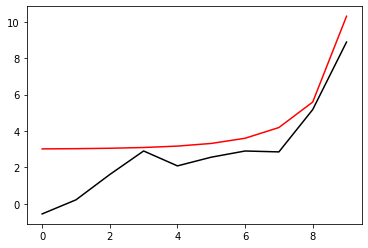

In [177]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [146]:
def F_func(a,b):
    return 2*b/n_fin-m2*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [160]:
def LP2(hh, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m2*dn+(1-dn*hh[j])*pi+dn*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh):
    Positive=[]
    while len(Positive)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        for i in range (batch*100):
            if len(Positive)>=batch: break
            if tf.math.abs(F_func(phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]])
            else: continue
    return Positive
def NN_func_n(hh):
    Negative=[]
    while len(Negative)<batch:
        phi1=np.random.uniform(0.0, 1.5, 2000)
        pi1=np.random.uniform(-0.2, 0.2, 2000)
        phi_1, pi_1 = LP2(hh, phi1, pi1)
        for i in range (batch*3):
            if len(Negative)>=batch: break
            if tf.math.abs(F_func(phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, list1):
    PP=[]
    NN=[]
    for i in range (batch):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [157]:
for i in range (set):
    Positive[i]=NN_func_p(h_real)
    Negative[i]=NN_func_n(h_real)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [178]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, Negative[i])[1])

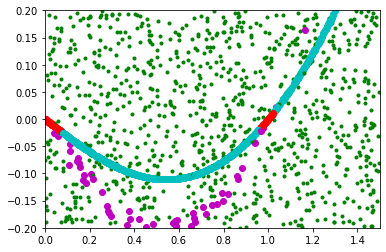

In [179]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [180]:
def Error_func(hh, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, phi0, pi0)
    phi_1, pi_1=LP2(hh, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=batch-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [181]:
for i in range (set):
    print(Error_func(h_real, Positive[i], Negative[i]))
for i in range (set):
    print(Error_func(h, Positive[i], Negative[i]))

tf.Tensor(0.00022153178880159497, shape=(), dtype=float64)
tf.Tensor(0.0002212931779978128, shape=(), dtype=float64)
tf.Tensor(0.00022147046876365873, shape=(), dtype=float64)
tf.Tensor(0.00022219547938319873, shape=(), dtype=float64)
tf.Tensor(0.00022159864921713235, shape=(), dtype=float64)
tf.Tensor(0.00022147922659089992, shape=(), dtype=float64)
tf.Tensor(0.00022157063144147727, shape=(), dtype=float64)
tf.Tensor(0.00022138709310006333, shape=(), dtype=float64)
tf.Tensor(0.00022169023912778807, shape=(), dtype=float64)
tf.Tensor(0.00022131374551294825, shape=(), dtype=float64)
tf.Tensor(0.0009037164290549754, shape=(), dtype=float64)
tf.Tensor(0.00022137886494745962, shape=(), dtype=float64)
tf.Tensor(0.00022142359325496186, shape=(), dtype=float64)
tf.Tensor(0.00022159328318684557, shape=(), dtype=float64)
tf.Tensor(0.00030149609744058615, shape=(), dtype=float64)
tf.Tensor(0.00026534806271740375, shape=(), dtype=float64)
tf.Tensor(0.00022167672247510207, shape=(), dtype=float64)

tf.Tensor(8.972293494322043, shape=(), dtype=float64)
tf.Tensor(9.064155554530801, shape=(), dtype=float64)
tf.Tensor(7.228316123819027, shape=(), dtype=float64)
tf.Tensor(11.008560056627974, shape=(), dtype=float64)
tf.Tensor(11.006846379904253, shape=(), dtype=float64)
tf.Tensor(10.008567449720092, shape=(), dtype=float64)
tf.Tensor(7.008579323954632, shape=(), dtype=float64)
tf.Tensor(8.062148758252098, shape=(), dtype=float64)
tf.Tensor(8.939592692104968, shape=(), dtype=float64)
tf.Tensor(11.959062003245494, shape=(), dtype=float64)
tf.Tensor(9.006263284013897, shape=(), dtype=float64)
tf.Tensor(10.003040827769992, shape=(), dtype=float64)
tf.Tensor(8.401148466699146, shape=(), dtype=float64)
tf.Tensor(9.011124795434235, shape=(), dtype=float64)
tf.Tensor(10.538857365977115, shape=(), dtype=float64)
tf.Tensor(9.008567586436472, shape=(), dtype=float64)
tf.Tensor(10.008567448605946, shape=(), dtype=float64)
tf.Tensor(10.798152735344086, shape=(), dtype=float64)
tf.Tensor(9.76141964

In [173]:
def run(i):
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[i], Negative[i])
        gradients=g.gradient(loss, [h])
    optimizer.apply_gradients(zip(gradients, [h]))

201 8.009099925513407
[-0.5318273   0.24091317  1.62935615  2.91718049  2.09699846  2.56733451
  2.89924658  2.84255357  5.15923833  9.07232972]


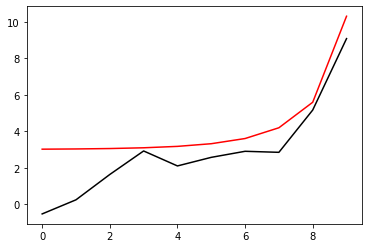

402 9.008627256838002
[-0.51423712  0.25766866  1.64414505  2.92838219  2.1074762   2.57056849
  2.89468249  2.83099525  5.14260087  9.23973777]


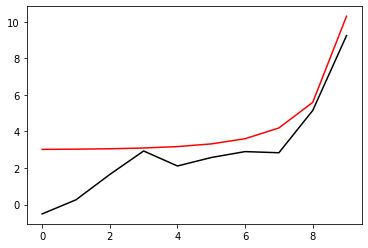

603 8.12266969871887
[-0.50304417  0.26788706  1.65219543  2.93258251  2.1109465   2.56671869
  2.88351584  2.813982    5.12187973  9.38222157]


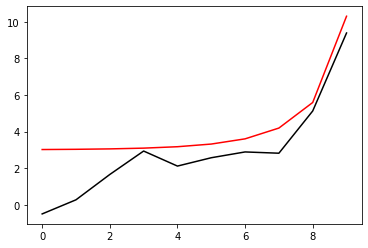

804 9.077723518899553
[-0.4945166   0.27527932  1.65724121  2.93357113  2.11110616  2.55936071
  2.86886952  2.79393746  5.09880025  9.49916396]


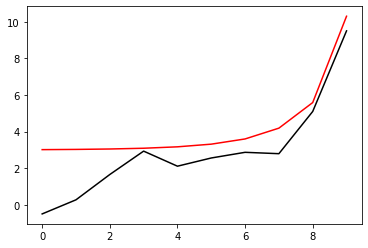

1005 8.023901037102432
[-0.48675387  0.281738    1.66117453  2.93324073  2.10975353  2.55016284
  2.85207759  2.77173009  5.07380973  9.59082143]


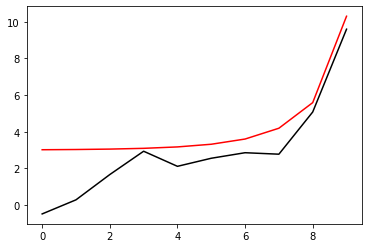

1206 9.98494964315932
[-0.47873405  0.28826887  1.66498316  2.9325546   2.10777888  2.53990943
  2.8336996   2.74762013  5.04691294  9.65867393]


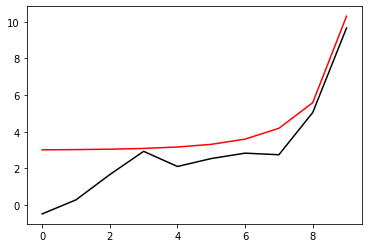

1407 8.019224402716734
[-0.46972369  0.29558517  1.66934917  2.93214635  2.10573307  2.52901609
  2.81392212  2.72151779  5.01779944  9.70554252]


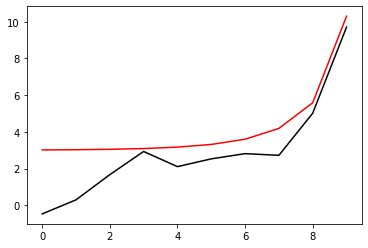

1608 10.924097045042803
[-0.45880323  0.30459147  1.67513882  2.93280992  2.10429727  2.51794761
  2.79286531  2.6931444   4.98587526  9.73531797]


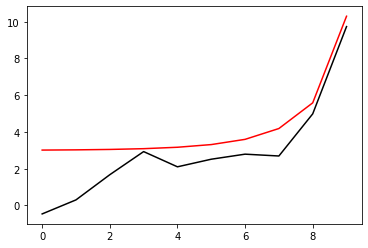

1809 12.00817561491237
[-0.44500315  0.31623628  1.68324081  2.93531984  2.1040851   2.50700723
  2.77038761  2.66188713  4.95017135  9.75234206]


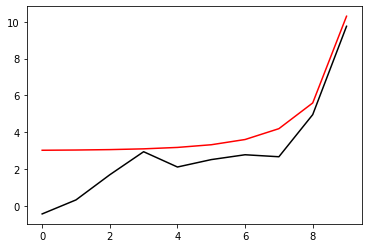

2010 9.008116831962747
[-0.4276183   0.33125932  1.69439537  2.94037239  2.10572457  2.49661659
  2.7465928   2.62749673  4.91014471  9.76069645]


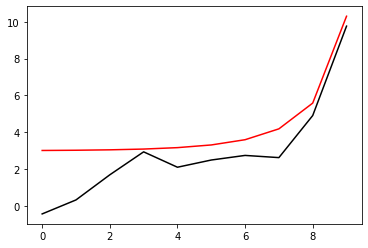

2211 8.00813036871259
[-0.40807181  0.34837433  1.70747025  2.94702609  2.10853772  2.48645557
  2.72166365  2.59069651  4.86690453  9.76370359]


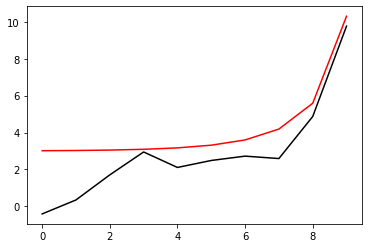

2412 8.995744973530448
[-0.38912472  0.36500393  1.72012901  2.95328594  2.11100438  2.47578434
  2.69599011  2.55305855  4.82285408  9.76376443]


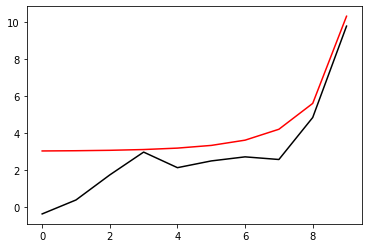

2613 12.921022092636669
[-0.37192088  0.38005841  1.73136339  2.95827377  2.11244496  2.46433342
  2.66999123  2.51569986  4.77950733  9.7624228 ]


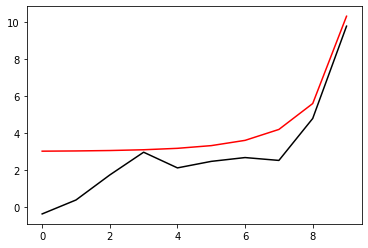

2814 10.007632913228221
[-0.35562335  0.3942814   1.74182325  2.96253224  2.11325743  2.45237734
  2.64386855  2.47875058  4.73687739  9.76053255]


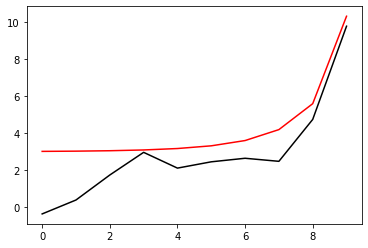

3015 9.017828214618644
[-0.33736275  0.41037119  1.75401404  2.96831099  2.11528485  2.44116556
  2.61799368  2.44163545  4.69368883  9.75846263]


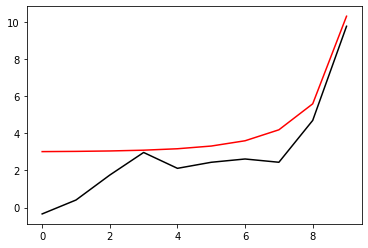

3216 8.687418718463801
[-0.31226299  0.43289118  1.77213412  2.97932266  2.12151285  2.43260613
  2.59270624  2.40303694  4.64743872  9.75628368]


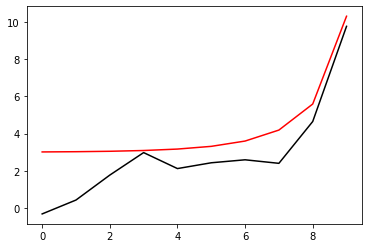

3417 10.007752653367751
[-0.27398912  0.46785429  1.80173751  3.00047122  2.13593077  2.42937323
  2.56892454  2.36207502  4.59595464  9.75388922]


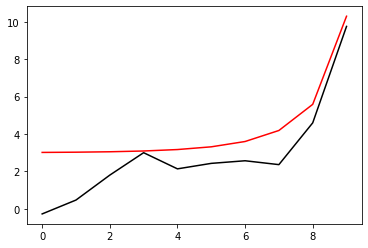

3618 9.92161378759299
[-0.24217641  0.49730408  1.82630863  3.01679176  2.14560354  2.42184343
  2.54199236  2.3193391   4.54379268  9.75135803]


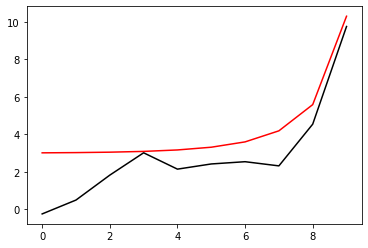

3819 6.96576971477277
[-0.21967837  0.51784028  1.84211906  3.02432936  2.14645838  2.40590765
  2.50825128  2.27232519  4.48972018  9.74879605]


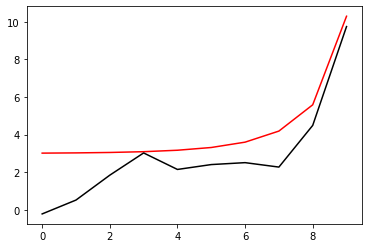

4020 9.007580098877929
[-0.19184751  0.54299588  1.86187097  3.03501078  2.14929994  2.39057154
  2.47372143  2.22369387  4.43371154  9.74617205]


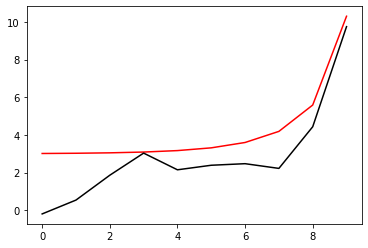

4221 10.123497410780875
[-0.16205145  0.56950569  1.88240083  3.04579365  2.15124222  2.37322634
  2.43618749  2.17164407  4.37435005  9.74344582]


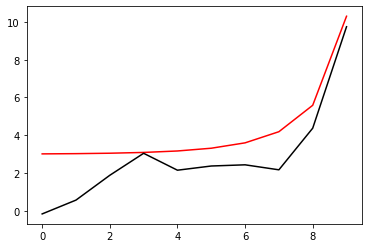

4422 10.00768868799344
[-0.14011388  0.58858122  1.89568204  3.04922042  2.14547726  2.34772495
  2.39081899  2.11311069  4.31007942  9.7404791 ]


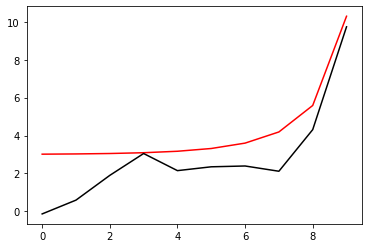

4623 9.75840418425521
[-0.12113365  0.60502382  1.90637255  3.04971325  2.136114    2.31752051
  2.34027103  2.04992239  4.24194433  9.73728498]


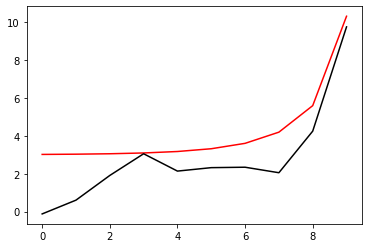

4824 10.399707732195122
[-0.10160712  0.62214144  1.91759821  3.05018701  2.12579921  2.28482634
  2.28624994  1.98322643  4.17055108  9.73393485]


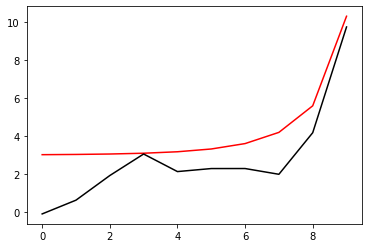

5025 10.97781582225778
[-0.07871215  0.64265724  1.9319746   3.05308687  2.11668781  2.25127735
  2.22978381  1.91345817  4.0958267   9.73044522]


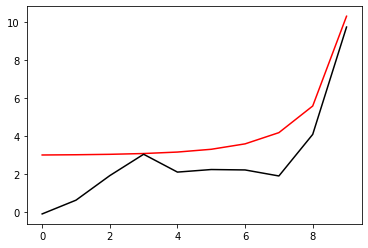

5226 9.001731557452423
[-0.04894462  0.66987209  1.95255956  3.06109834  2.1109409   2.21822739
  2.17146467  1.84050279  4.0170331   9.72677977]


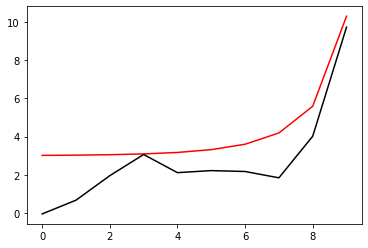

5427 5.715220451258794
[-0.01269238  0.70338986  1.97901659  3.07401515  2.1086802   2.18644814
  2.11302302  1.76660024  3.93647604  9.72299724]


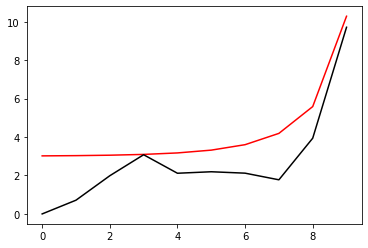

5628 8.828950478374814
[0.02460896 0.73792681 2.00651362 3.087997   2.10779832 2.1567032
 2.05791809 1.69674497 3.85994061 9.71933081]


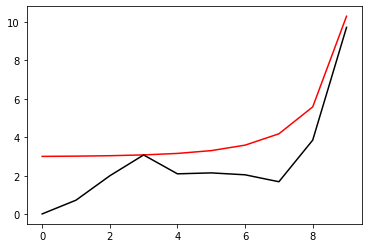

5829 8.007064516157433
[0.06411117 0.77480913 2.03689073 3.10597766 2.11261864 2.13497709
 2.01209013 1.63585459 3.79149612 9.71601261]


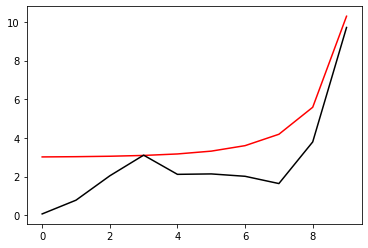

6030 6.486471205670914
[0.1161675  0.82549308 2.08292588 3.1423825  2.13877833 2.13738374
 1.98927267 1.59364348 3.73719611 9.71331328]


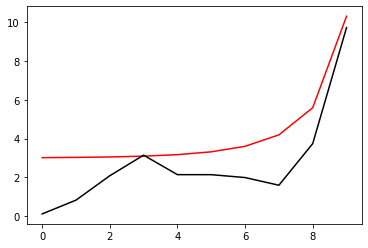

6231 8.007056963069136
[0.16021146 0.86886682 2.12253885 3.17393375 2.16239459 2.1413722
 1.97147781 1.55772292 3.68924846 9.71121307]


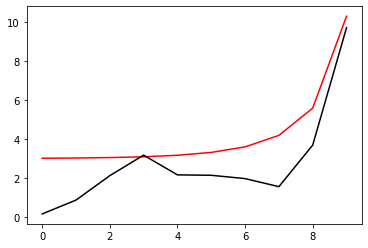

6432 8.056075941237442
[0.19880409 0.90533863 2.15414653 3.19688259 2.17760303 2.13868301
 1.94990327 1.52088726 3.64255713 9.70910496]


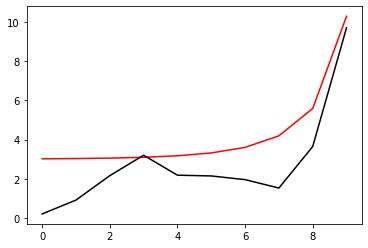

6633 9.653141852186138
[0.22497729 0.92906007 2.17309267 3.20794466 2.18259611 2.12892251
 1.9253453  1.48501533 3.59998772 9.70712824]


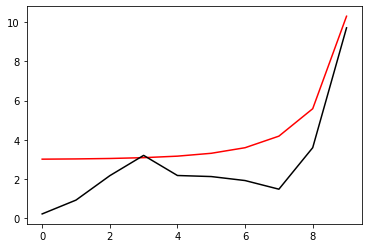

6834 10.127061561457502
[0.24735053 0.94904391 2.1885153  3.21591498 2.18507224 2.11746737
 1.89992673 1.44916943 3.55834805 9.70518553]


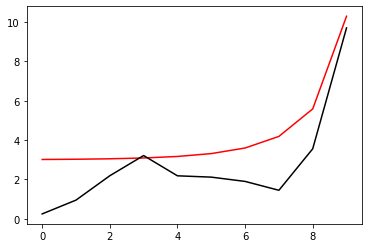

7035 9.751154308422883
[0.27344826 0.9728605  2.20790444 3.22796398 2.1914792  2.1093397
 1.87648265 1.41380522 3.51612477 9.70321442]


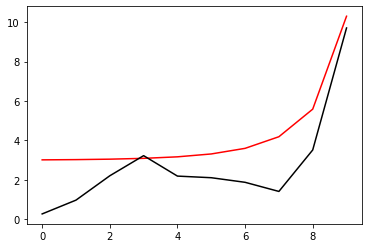

7236 8.906214701841254
[0.30886439 1.00584807 2.23620964 3.24844678 2.20527958 2.10670996
 1.85537989 1.37731388 3.47011779 9.70108545]


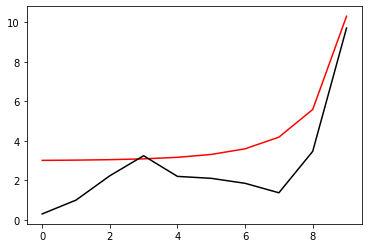

7437 10.006637095494806
[0.34984682 1.0436886  2.26834931 3.27128343 2.21940074 2.10154885
 1.82847931 1.33248128 3.41449115 9.69855857]


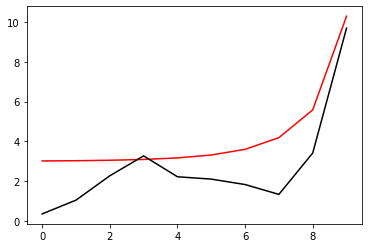

7638 10.003538433441875
[0.41145092 1.10149568 2.31984352 3.31261933 2.25048832 2.11048239
 1.81108866 1.29189977 3.35860296 9.69597395]


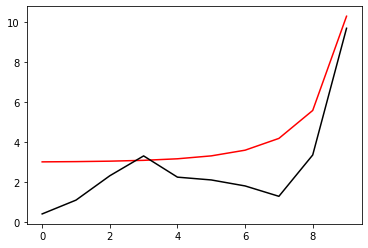

7839 7.997082659056474
[0.46481719 1.14951907 2.36029339 3.34206887 2.26946137 2.10873394
 1.78629832 1.24808366 3.30339997 9.69343434]


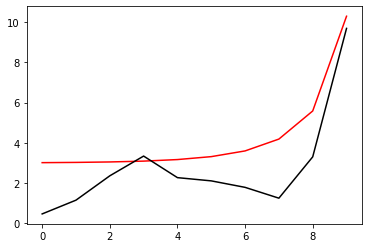

8040 8.748327027319235
[0.49387593 1.17454844 2.37836823 3.34922399 2.26611839 2.08472945
 1.74103147 1.18797584 3.23692089 9.69037256]


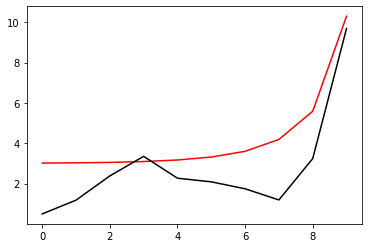

8241 8.007075033874477
[0.52065322 1.19791234 2.39501334 3.35467583 2.26022469 2.05626384
 1.68951679 1.12142403 3.16482844 9.68705983]


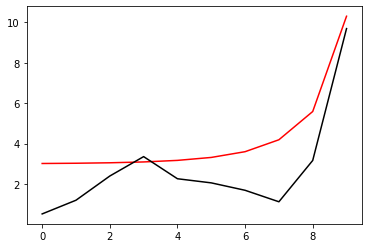

8442 10.064446106190653
[0.54325957 1.21801045 2.40897108 3.35760041 2.25147528 2.02372795
 1.63314389 1.05082294 3.09003473 9.68362452]


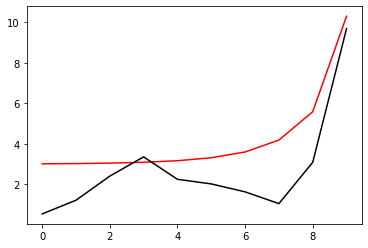

8643 10.247135749114035
[0.55979581 1.23297339 2.41849214 3.35648712 2.23868219 1.98651028
 1.57219902 0.97742244 3.01435704 9.68014788]


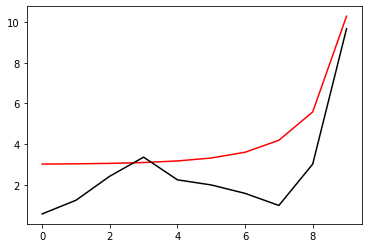

8844 6.788632009380619
[0.57336892 1.24556387 2.426115   3.35373269 2.22404545 1.94650585
 1.50799228 0.90188653 2.93785768 9.67664869]


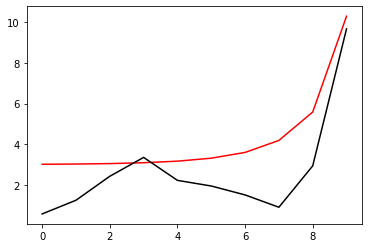

9045 11.00682242229129
[0.5876126  1.25925093 2.43527327 3.35287912 2.21127299 1.90750186
 1.44361708 0.82601694 2.86116644 9.67313802]


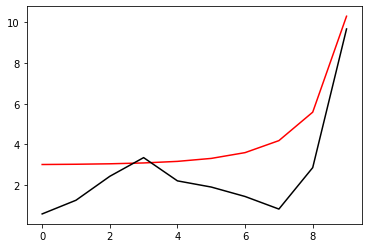

9246 11.492655218122259
[0.60635796 1.27765347 2.4494047  3.35721775 2.20349641 1.87230572
 1.38066431 0.74967634 2.78288762 9.66956081]


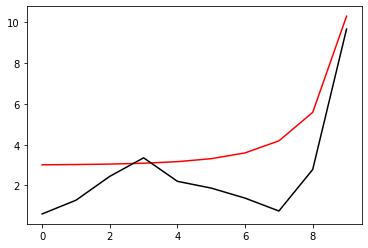

9447 8.99458974667137
[0.63448463 1.30527671 2.47253191 3.37010722 2.20317919 1.84202205
 1.31830357 0.6701128  2.6990681  9.66572523]


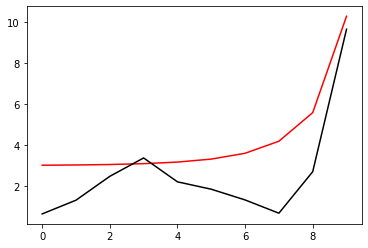

9648 8.17692902970481
[0.6756792  1.34577225 2.5080632  3.39436748 2.21210027 1.81653605
 1.25446372 0.58390192 2.60541292 9.66143846]


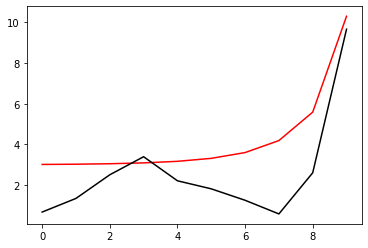

9849 8.006525686425743
[0.73630366 1.40505533 2.56141893 3.4346671  2.23363337 1.79686294
 1.18801671 0.48891937 2.49911744 9.65655301]


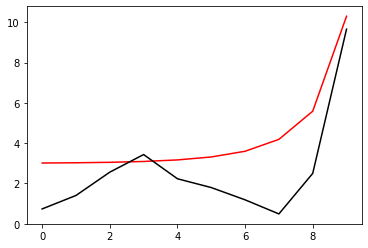

In [182]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, Positive[i%set], Negative[i%set]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 9.842806967888908
[0.90205611 1.5636663  2.70449558 3.54761869 2.30234419 1.78066519
 1.0832467  0.32993604 2.31207702 9.64794494]


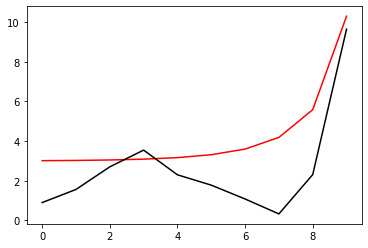

402 8.2518655662731
[1.03600072 1.69338708 2.82437254 3.64714843 2.36972773 1.79130403
 1.0338377  0.23812468 2.19591778 9.64263368]


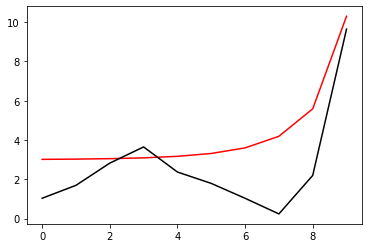

603 6.194675805443087
[1.16992489 1.82391876 2.94638539 3.75068251 2.44227023 1.80540495
 0.98370984 0.14341394 2.07652353 9.63717531]


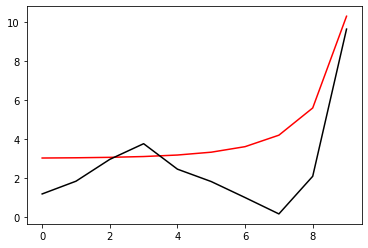

804 6.391948337937279
[1.30798717 1.95897396 3.07422583 3.86273301 2.52591888 1.82672041
 0.92766707 0.03622067 1.94482487 9.63110571]


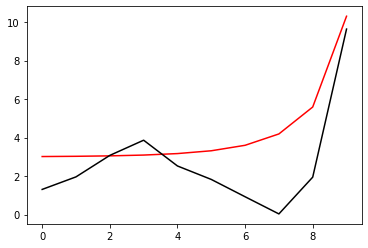

1005 5.939190440031727
[ 1.49927227  2.14888957  3.2599461   4.03755351  2.67669172  1.91146411
  0.90249085 -0.07438993  1.79224157  9.62409103]


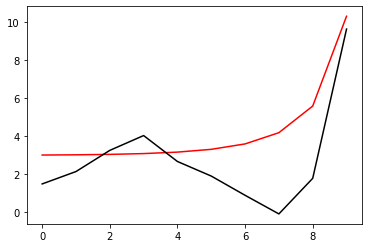

1206 3.8104805880521813
[ 1.82280286  2.47191666  3.58140663  4.3536329   2.97533157  2.14713279
  0.96021257 -0.21046901  1.56542022  9.61370468]


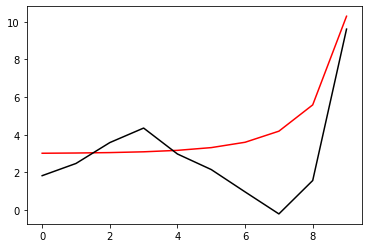

1407 0.01611918879248316
[ 2.02197771  2.66804047  3.77615797  4.54874396  3.17253752  2.34228317
  1.1031943  -0.21859545  1.47408254  9.60951488]


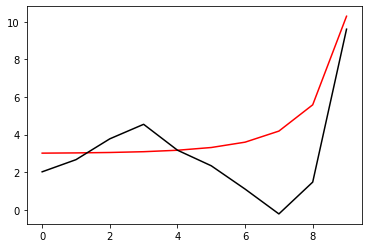

1608 0.4361625300313941
[ 2.09662471  2.73705162  3.84106656  4.61113629  3.23603883  2.40773653
  1.16506287 -0.19259356  1.46999813  9.60931295]


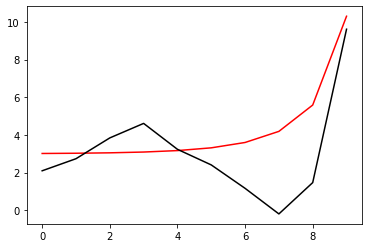

1809 0.009242505400305332
[ 2.19017442  2.82333184  3.92192178  4.68852933  3.31397042  2.48769075
  1.24179168 -0.15493548  1.47111883  9.60935628]


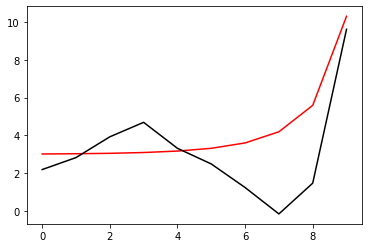

2010 1.008148324542775
[ 2.26621234  2.89496013  3.99057644  4.75609203  3.38479482  2.56400876
  1.32225614 -0.10271418  1.48724361  9.61010259]


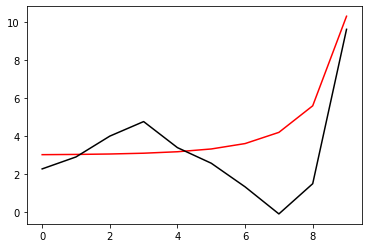

2211 0.006784113290264267
[ 2.27802443  2.90740402  4.00439517  4.7726814   3.40905412  2.59798168
  1.37088296 -0.05402141  1.51967613  9.61158955]


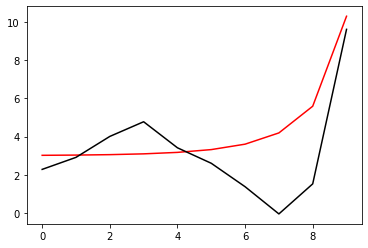

2412 0.00669077439747754
[ 2.28559737e+00  2.91612428e+00  4.01506584e+00  4.78683215e+00
  3.43202472e+00  2.63165645e+00  1.42003598e+00 -2.12646554e-03
  1.55727151e+00  9.61330689e+00]


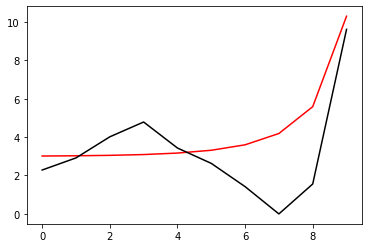

2613 0.008722221969314216
[2.2956457  2.92717402 4.028065   4.80349242 3.45801864 2.66858189
 1.47198313 0.05344282 1.59975599 9.61525047]


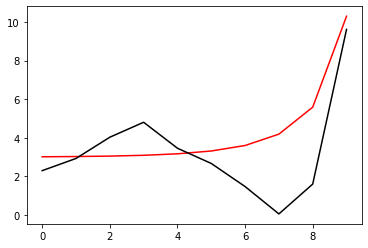

2814 0.9430870102540113
[2.30851647 2.94059818 4.04309265 4.82193808 3.48576234 2.70686532
 1.52456613 0.1108425  1.64615941 9.61737806]


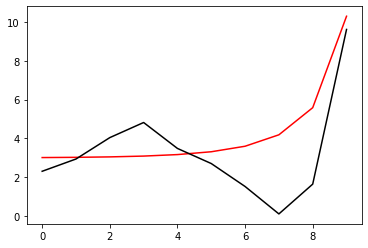

3015 0.829087983836509
[2.31567825 2.9485595  4.0528259  4.83518681 3.50858607 2.74001557
 1.57185538 0.16518855 1.69319361 9.61953237]


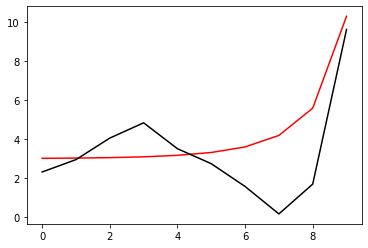

3216 0.006627282089107834
[2.31921904 2.95342658 4.06001088 4.84650523 3.53041813 2.77280625
 1.61926669 0.22090351 1.74327773 9.62182408]


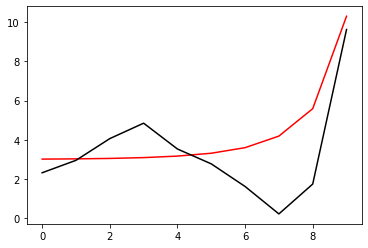

3417 1.0066045384167635
[2.32154978 2.95761192 4.06714493 4.85856978 3.55414419 2.80839141
 1.67008539 0.28083875 1.79847541 9.62434641]


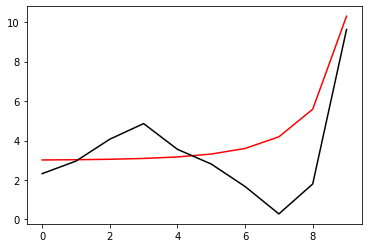

3618 0.006594659629422886
[2.3229886  2.96141272 4.07454149 4.87174195 3.58016173 2.84720222
 1.72478144 0.34552401 1.85949921 9.62713626]


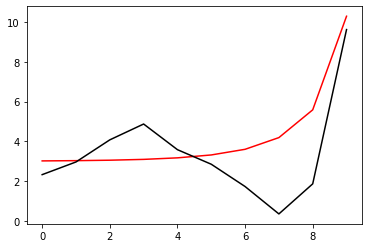

3819 0.006589882463470669
[2.32300452 2.96438111 4.08186005 4.88581028 3.60837787 2.88926266
 1.78350973 0.4152377  1.92685416 9.63021971]


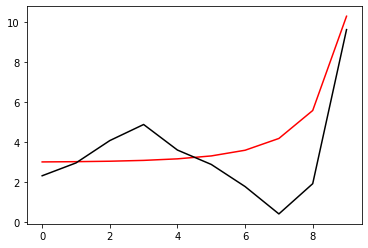

4020 0.006597948131781888
[2.32116189 2.96619692 4.08890332 4.90068925 3.6387108  2.93444294
 1.84605709 0.48985541 2.00086531 9.63361443]


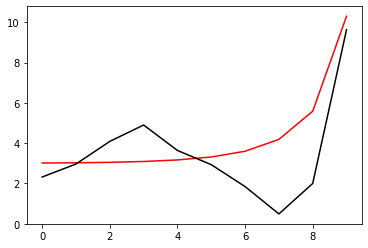

4221 1.052603075607714
[2.31628819 2.96538033 4.09382458 4.9140649  3.66823478 2.97916153
 1.90831492 0.56524579 2.07828091 9.63717044]


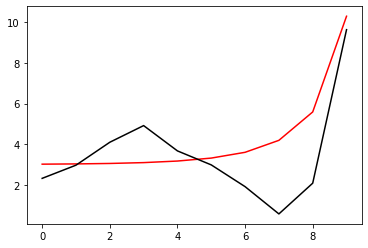

4422 0.9869705417469395
[2.30907146 2.96211559 4.09623986 4.92490203 3.69524971 3.0210571
 1.96732915 0.63778647 2.15499703 9.64069617]


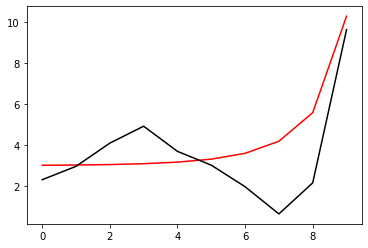

4623 2.0066051301939627
[2.30122491 2.95791117 4.0974054  4.93415434 3.72040666 3.06045926
 2.02306662 0.70677128 2.22928834 9.64410685]


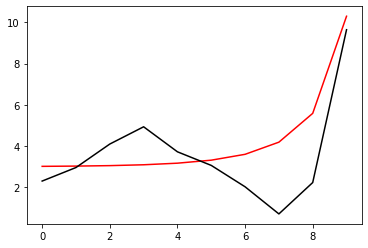

4824 1.9175365432357658
[2.29354778 2.95353313 4.09801538 4.94241449 3.74423121 3.09782846
 2.07592786 0.77230808 2.30055662 9.64736714]


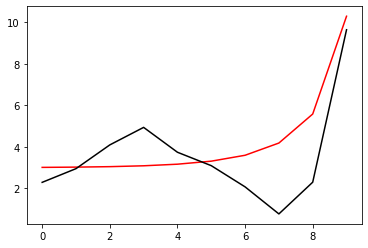

5025 1.0084466971351347
[2.28674319 2.94980748 4.09899702 4.95070142 3.76787069 3.13443975
 2.12728987 0.83562604 2.36942706 9.65050752]


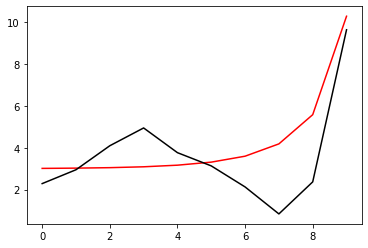

5226 0.006620943844612474
[2.28163981 2.94787456 4.10180303 4.96078665 3.79338288 3.17264818
 2.17972996 0.89928782 2.43801523 9.6536303 ]


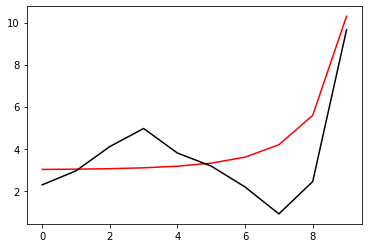

5427 0.39345584739190026
[2.27803691 2.947997   4.10718493 4.97392945 3.8223735  3.21454398
 2.23583802 0.96638442 2.5096551  9.65689146]


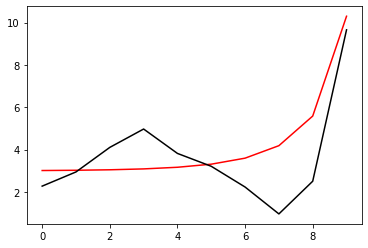

5628 0.9395144184354228
[2.27363541 2.94775929 4.11261074 4.98745132 3.85179972 3.25702417
 2.29276235 1.03492294 2.58366644 9.66027935]


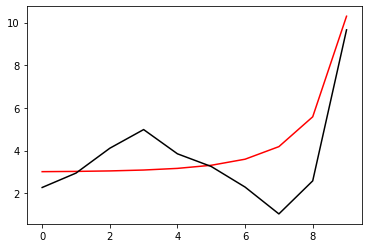

5829 0.0066588613651297306
[2.26697214 2.94463424 4.11448512 4.99669054 3.87606655 3.29379138
 2.343849   1.0983521  2.6541719  9.66351353]


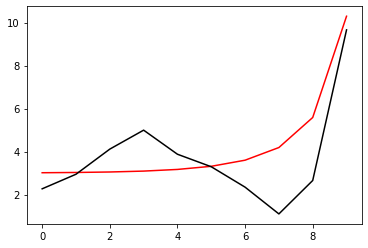

6030 0.006662894135877153
[2.25996718 2.94022853 4.11407674 5.00258565 3.89597626 3.32544085
 2.38941615 1.15636924 2.71991871 9.6665288 ]


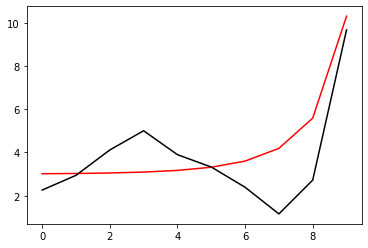

6231 2.006661533513285
[2.25426781 2.93643623 4.113522   5.00752355 3.91421351 3.35485679
 2.43239916 1.21161303 2.78284751 9.66941717]


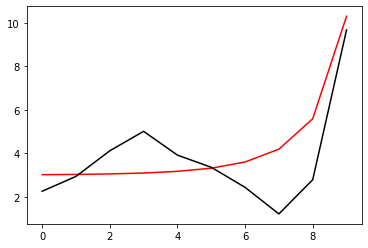

6432 0.006657566028756282
[2.24998669 2.93370664 4.11362306 5.01267154 3.93223398 3.38377371
 2.47471855 1.26607414 2.84487855 9.67227006]


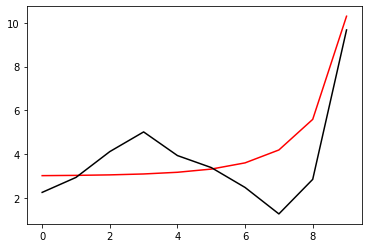

6633 0.006914543160813941
[2.24592545 2.93104839 4.11359817 5.01744569 3.94953451 3.41178936
 2.51605415 1.31959669 2.90610373 9.67509225]


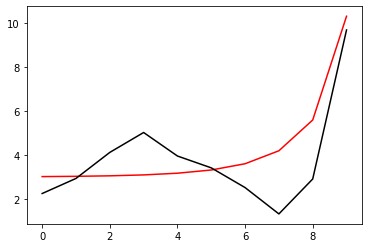

6834 0.006646905461777639
[2.24143223 2.92775939 4.11267356 5.02096716 3.96510946 3.43771071
 2.55502826 1.37069844 2.96505916 9.67781222]


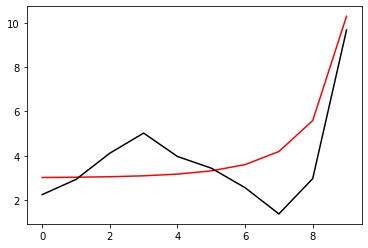

7035 0.006640185202052852
[2.23702011 2.9242544  4.11115414 5.02342123 3.97910651 3.46153732
 2.59146552 1.41897001 3.02108321 9.68039342]


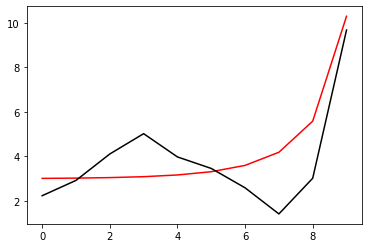

7236 0.9551359060929411
[2.23297732 2.920804   4.10930202 5.02508217 3.99193329 3.48372832
 2.62586016 1.46484133 3.07444572 9.6828406 ]


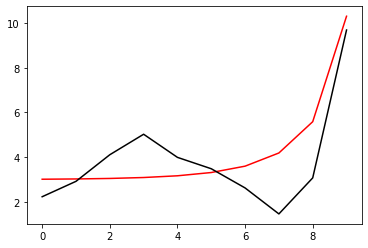

7437 1.006616678342592
[2.22928774 2.91741866 4.10716647 5.02606189 4.00387209 3.50467931
 2.65871335 1.50883434 3.12559547 9.68517585]


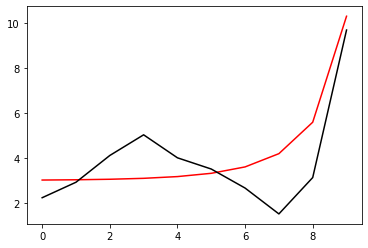

7638 0.006598176666308204
[2.22589199 2.91408529 4.10479386 5.02648977 4.01522251 3.5248203
 2.69057743 1.55154978 3.17509796 9.68742721]


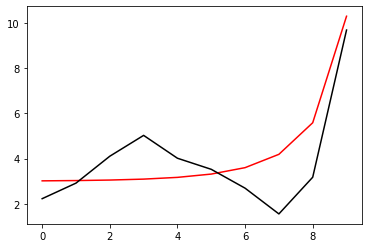

7839 0.951306352737057
[2.22262794 2.91068489 4.10212392 5.02638994 4.02617059 3.54448014
 2.72192687 1.59355113 3.22353547 9.68962432]


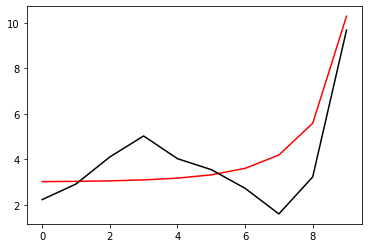

8040 0.006567982842224773
[2.2195508  2.90732677 4.09932711 5.02600744 4.03708727 3.56412532
 2.75330154 1.63538228 3.2713944  9.6917974 ]


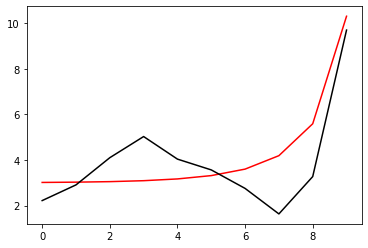

8241 0.017661161568172268
[2.21665106 2.90405196 4.09650706 5.02552827 4.04829169 3.58419709
 2.78525014 1.67763227 3.3192417  9.69397721]


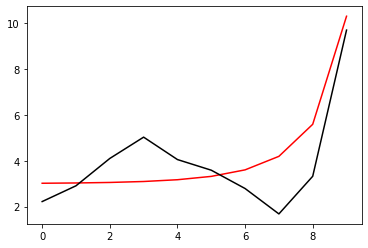

8442 0.022820065902797722
[2.21407042 2.90106898 4.09395274 5.02534257 4.06030984 3.60535163
 2.81852306 1.7210554  3.36776498 9.69619787]


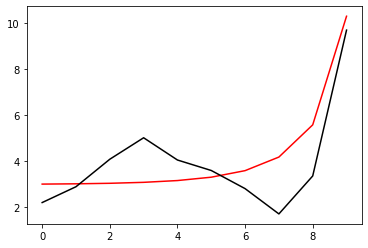

8643 1.005998783123028
[2.21203409 2.89867702 4.09206046 5.02597485 4.07380648 3.6284237
 2.85408585 1.76665228 3.41791935 9.69850717]


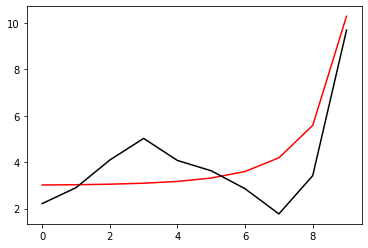

8844 0.9488634809333266
[2.21142109 2.89791323 4.09208499 5.02896864 4.09055184 3.65553716
 2.89432889 1.81690533 3.47209867 9.70100723]


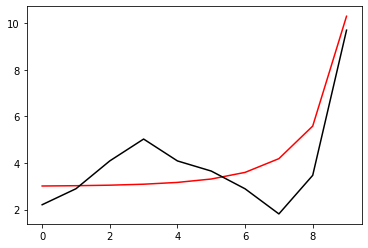

9045 0.00647629718295035
[2.21321709 2.90027498 4.09619195 5.03733099 4.11403066 3.69125614
 2.94489657 1.87836931 3.53725813 9.70401264]


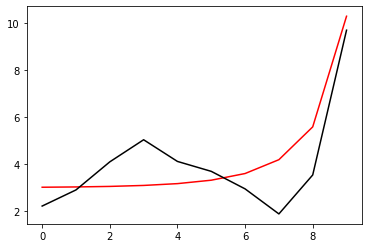

9246 0.7054251946321629
[2.21423807 2.9029886  4.10204095 5.04912215 4.14175376 3.73383192
 3.00567336 1.95370458 3.6185626  9.70773147]


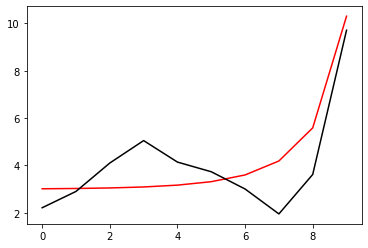

9447 0.006984459200574376
[2.21044161 2.90155091 4.10436018 5.05787666 4.16593251 3.77325716
 3.06416778 2.02854111 3.70098783 9.71149131]


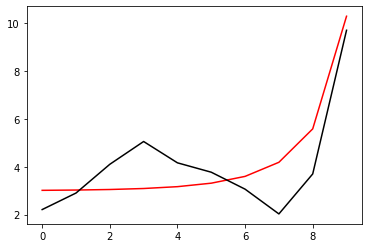

9648 1.0081390437613973
[2.20509281 2.89890402 4.1057455  5.06582667 4.1887705  3.81096137
 3.12043482 2.10107208 3.78137471 9.71515785]


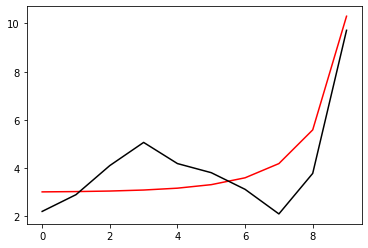

9849 0.0069340305602073795
[2.19911699 2.89571542 4.10659945 5.07310097 4.2102094  3.8465335
 3.17367609 2.1702227  3.85878389 9.7186974 ]


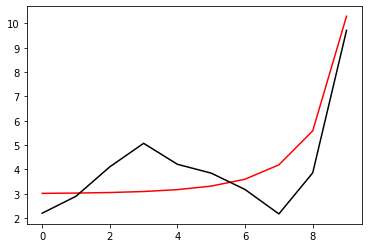

In [183]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, Positive[i%set], Negative[i%set]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.007854365855776337
[2.19231277 2.89306908 4.10943953 5.08450274 4.24361226 3.89868168
 3.25582933 2.2796611  3.98235837 9.7244242 ]


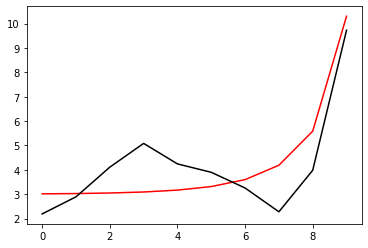

402 0.015321010645855877
[2.18811586 2.8906559  4.10957853 5.08865221 4.25726354 3.92036164
 3.28810148 2.3240312  4.03869273 9.72697695]


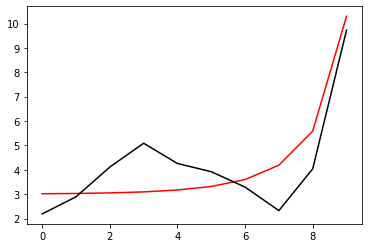

603 0.011008858861395987
[2.18328971 2.88698737 4.10778983 5.09010669 4.26724794 3.93741078
 3.31474894 2.36192078 4.08804063 9.7292216 ]


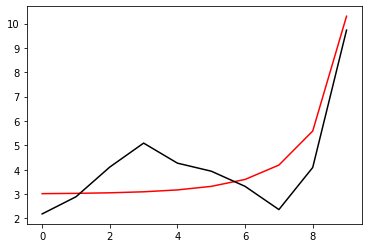

804 0.025486556493381003
[2.17879915 2.88309799 4.10521045 5.09015318 4.27513398 3.9516009
 3.33775099 2.39548061 4.13271169 9.73126293]


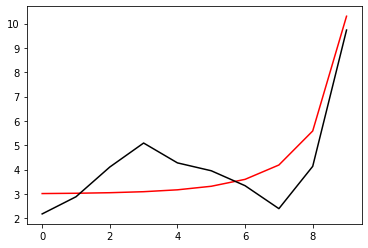

1005 0.02435391669116023
[2.17455041 2.87903588 4.10204926 5.08919057 4.28155655 3.96381975
 3.35826178 2.4261016  4.17424137 9.73316752]


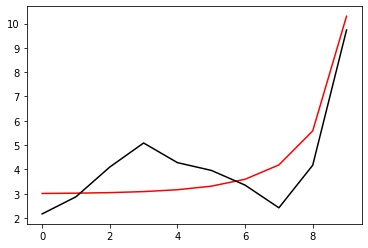

1206 0.024937284330587218
[2.17049923 2.874875   4.09850461 5.08755558 4.28700738 3.97473698
 3.37713703 2.45480315 4.21373319 9.73498193]


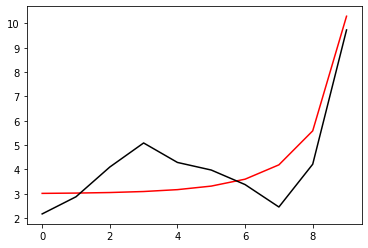

1407 0.015110597827396757
[2.1666386  2.87068775 4.09473036 5.08549152 4.29182683 3.98481077
 3.39496039 2.48228178 4.25194014 9.73673718]


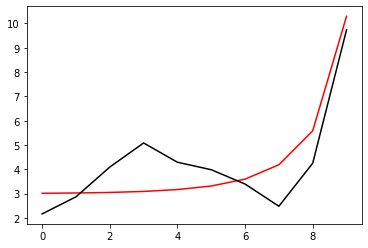

1608 0.035964940486891
[2.1629024  2.86645348 4.09075362 5.08307984 4.29615655 3.99426254
 3.41204329 2.5089362  4.28931328 9.73845361]


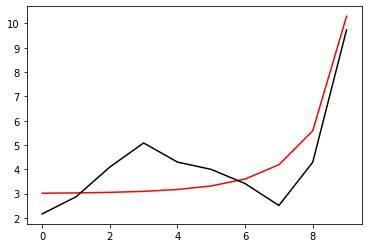

1809 0.011552023654427599
[2.15934182 2.86224977 4.08667941 5.08045709 4.30016741 4.00331336
 3.42866496 2.53510182 4.32621513 9.74014491]


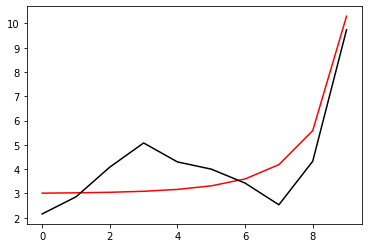

2010 0.021179650795400615
[2.15593508 2.85806523 4.08250861 5.07764039 4.30389546 4.01203427
 3.44494174 2.56094411 4.36284269 9.74182112]


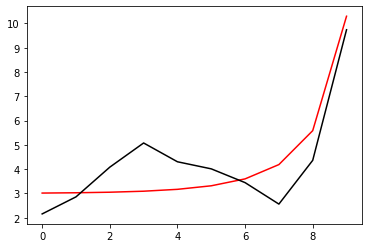

2211 0.0157266043683073
[2.15269941 2.85392043 4.0782659  5.07466085 4.30737888 4.0204849
 3.46096392 2.58658834 4.39934135 9.74348947]


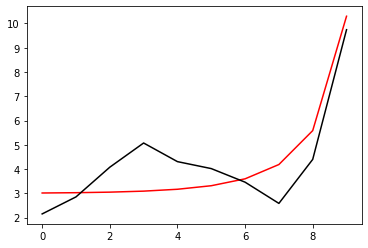

2412 0.021686932646716343
[2.14963345 2.84981158 4.07394504 5.07151069 4.31060734 4.02866623
 3.47675338 2.61208391 4.43577816 9.74515474]


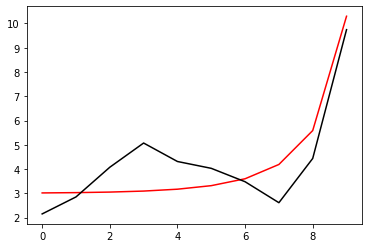

2613 0.011755848044549457
[2.14677503 2.84577376 4.06957608 5.06821343 4.31359385 4.03659261
 3.49233355 2.63746929 4.47219722 9.74681919]


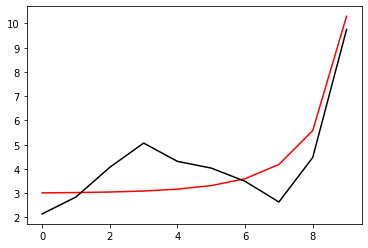

2814 0.020177402239522836
[2.14412351 2.84180395 4.06514985 5.06475041 4.31630423 4.04422492
 3.50766776 2.66271791 4.5085769  9.74848288]


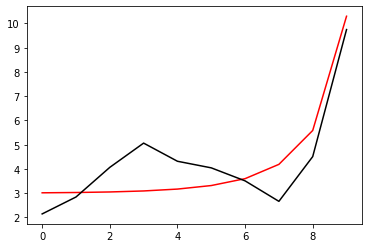

3015 0.009892799088907684
[2.14171433 2.83793918 4.06069839 5.06114212 4.31873773 4.05154759
 3.52272924 2.68779705 4.54487306 9.75014378]


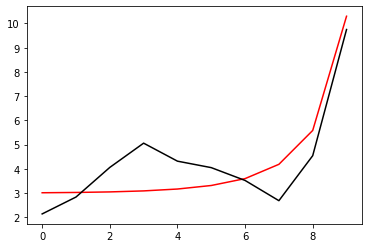

3216 0.015571106715684326
[2.13954305 2.83418045 4.05622042 5.05737709 4.32086142 4.05850952
 3.53745051 2.71262844 4.58099518 9.75179828]


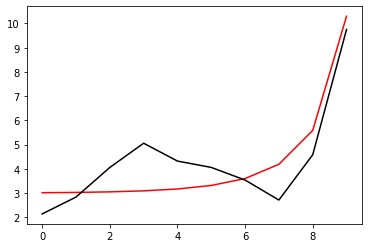

3417 1.0139541888853723
[2.1376181  2.83054639 4.05173612 5.05346764 4.32266709 4.06508025
 3.5517766  2.73713545 4.61684471 9.75344151]


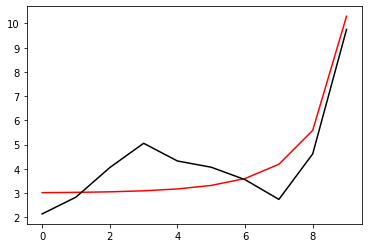

3618 0.008451698204424353
[2.13594863 2.82705968 4.04727309 5.04943679 4.32416069 4.07124205
 3.56566009 2.76124109 4.65231685 9.75506786]


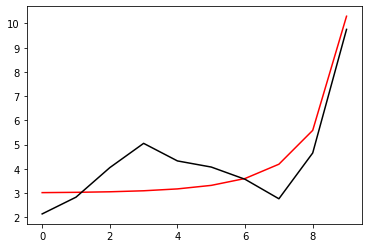

3819 0.017978066664330866
[2.1345093  2.82370793 4.0428248  5.04527544 4.32532022 4.07694995
 3.57902496 2.78483763 4.68727887 9.75667156]


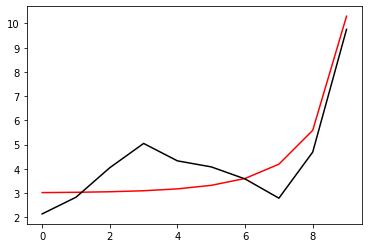

4020 0.016997012369949133
[2.13329881 2.82050298 4.03841036 5.04100283 4.32615701 4.08219362
 3.59182804 2.80784477 4.72162102 9.75824697]


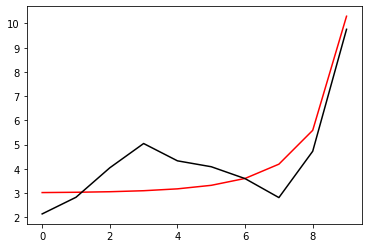

4221 1.0303942286594412
[2.13228302 2.8174206  4.0340116  5.03660195 4.32665081 4.08693483
 3.60400177 2.8301612  4.75522043 9.75978899]


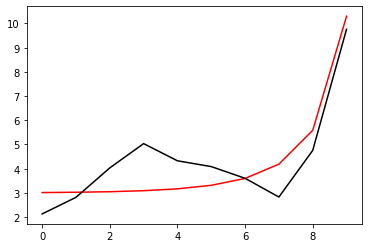

4422 0.015372823254074908
[2.13148813 2.81449777 4.02967341 5.03212192 4.32685291 4.09121071
 3.61555532 2.85175869 4.78801999 9.7612932 ]


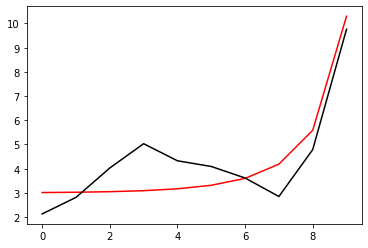

4623 1.9876483456848397
[2.13094304 2.81177376 4.02544404 5.02761827 4.32682703 4.09507771
 3.62652454 2.8726414  4.81999926 9.76275636]


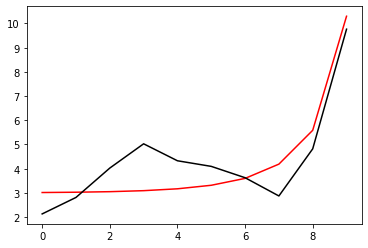

4824 1.0142269631233627
[2.13060681 2.80921042 4.02128814 5.02305856 4.32654753 4.09850476
 3.63686422 2.89274439 4.85108806 9.76417698]


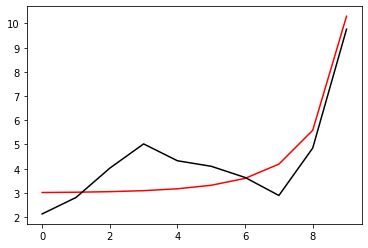

5025 1.029366536045811
[2.13043828 2.80676806 4.01716797 5.01840764 4.32598661 4.10146032
 3.64653117 2.9120067  4.88122059 9.76555485]


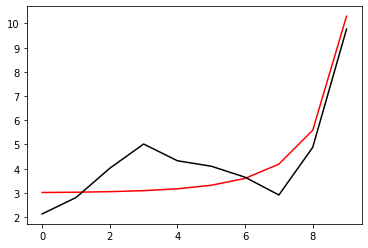

5226 0.006820709783653808
[2.13047145 2.80448699 4.01313069 5.01372064 4.32521253 4.10401585
 3.6555916  2.93047905 4.91043544 9.76689038]


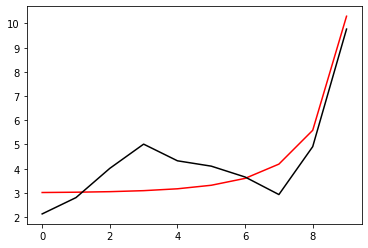

5427 0.012384213437955224
[2.13068486 2.80234789 4.00916059 5.00898766 4.32422761 4.10617942
 3.66405521 2.94816751 4.93874183 9.76818476]


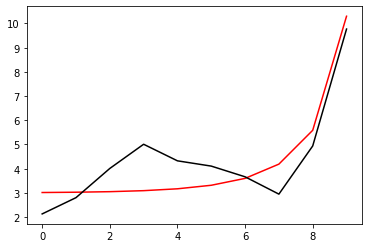

5628 0.010195915946532911
[2.13107165 2.80034668 4.0052577  5.00421495 4.32305026 4.10797624
 3.67195058 2.96509826 4.9661667  9.76943963]


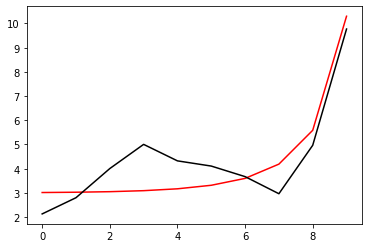

5829 0.010396856061340231
[2.1316199  2.79847384 4.00141647 4.99940331 4.3216935  4.10942813
 3.67930656 2.98130305 4.9927464  9.77065686]


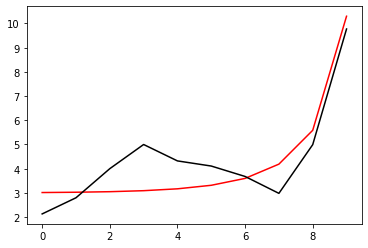

6030 0.011984566788722697
[2.13231655 2.79671845 3.99762975 4.99455177 4.320168   4.1105552
 3.68615216 2.99681651 5.01852148 9.77183839]


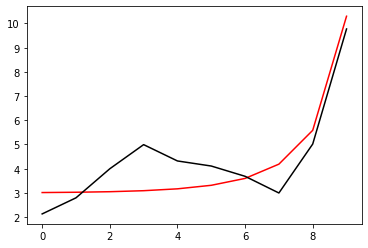

6231 2.0125462530293006
[2.13314922 2.79507054 3.99389158 4.98966073 4.31848551 4.11137933
 3.6925196  3.01167857 5.04353824 9.77298608]


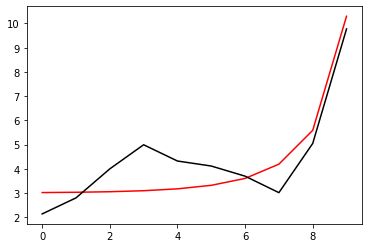

6432 0.009624701949363861
[2.13411403 2.79352913 3.99020541 4.98474022 4.31666691 4.11193163
 3.6984505  3.02593882 5.06785103 9.7741017 ]


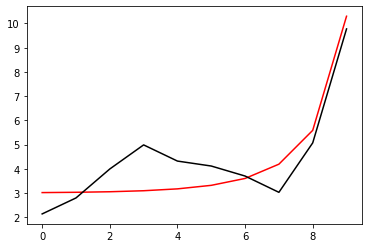

6633 0.00862845185736862
[2.13520124 2.79208707 3.98656822 4.97979344 4.31472552 4.11223547
 3.7039793  3.03964101 5.09150946 9.77518704]


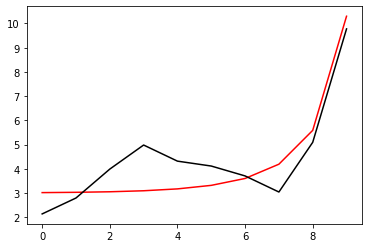

6834 0.014002899697590554
[2.13639267 2.79072759 3.98296616 4.97481154 4.31266095 4.11229956
 3.70912545 3.05281478 5.1145506  9.7762439 ]


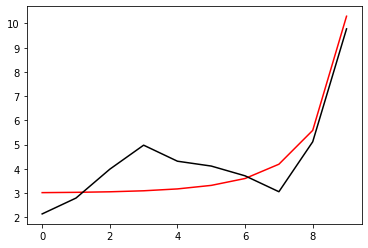

7035 0.0163224059795357
[2.1376735  2.78943781 3.97938981 4.96979048 4.31047762 4.11213755
 3.71391334 3.06549464 5.13701523 9.77727408]


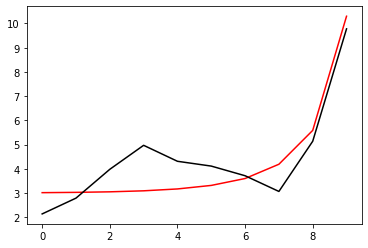

7236 0.03268184143767502
[2.13902801 2.7882032  3.97582746 4.96472345 4.30817669 4.11176011
 3.71836559 3.07771586 5.1589486  9.77827936]


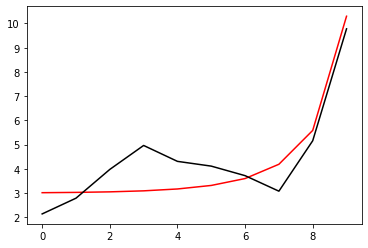

7437 1.0129143778204632
[2.14046468 2.7870361  3.9722962  4.95963334 4.30578837 4.11120454
 3.72252637 3.08952662 5.18039564 9.77926151]


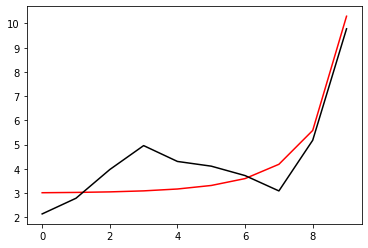

7638 0.008239947499428557
[2.14198338 2.78593922 3.96880269 4.95453219 4.30333194 4.110498
 3.72643158 3.10097059 5.20140247 9.78022236]


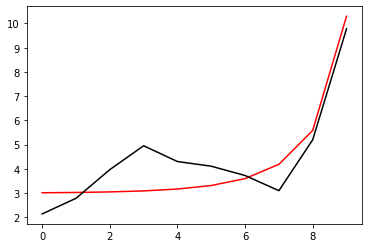

7839 0.13710090226363636
[2.14336977 2.78469143 3.96512808 4.949215   4.30063024 4.10950897
 3.73001822 3.1120787  5.22211665 9.78116384]


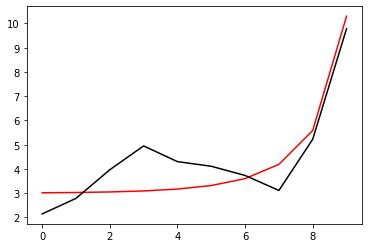

8040 0.011962017334672467
[2.14485472 2.78353437 3.96151661 4.94391803 4.29789886 4.10841352
 3.73339877 3.12286988 5.24242909 9.78208887]


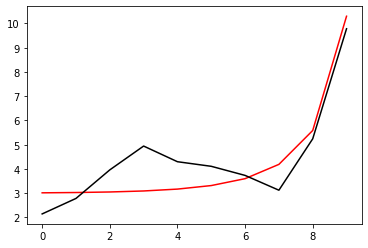

8241 0.013262816381058218
[2.14642342 2.78245442 3.95795719 4.93863419 4.29513648 4.10721738
 3.73658786 3.13336831 5.26237044 9.7829997 ]


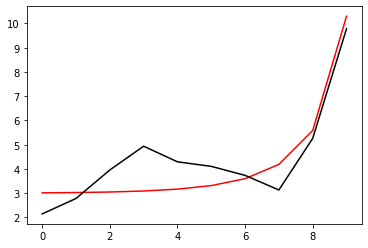

8442 0.010425500349495218
[2.1480695  2.7814472  3.9544485  4.9333665  4.29235198 4.10593624
 3.73960916 3.1436057  5.28197658 9.78389778]


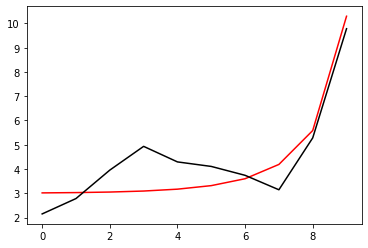

8643 0.9648346909842264
[2.14976619 2.78048876 3.95097177 4.92810446 4.28954644 4.10458643
 3.74249877 3.15364196 5.30133209 9.78478395]


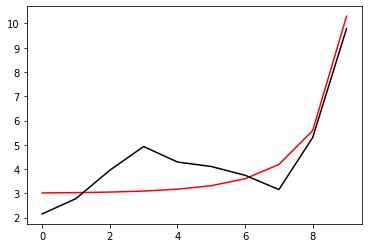

8844 0.08583418377569649
[2.15147077 2.77953296 3.94748061 4.92280571 4.28668714 4.10315172
 3.74526577 3.16352031 5.32051903 9.78565915]


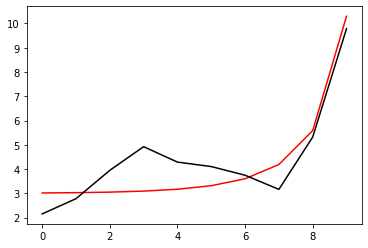

9045 0.00603818462325431
[2.15324307 2.77864469 3.94404169 4.91753389 4.28382843 4.10166754
 3.74791468 3.17320002 5.33943516 9.78652494]


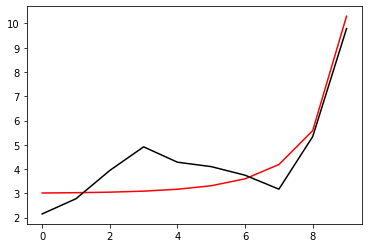

9246 0.011994736393477982
[2.15507327 2.77781527 3.94064854 4.91228616 4.28097278 4.10014299
 3.75046297 3.18270817 5.35811562 9.78738221]


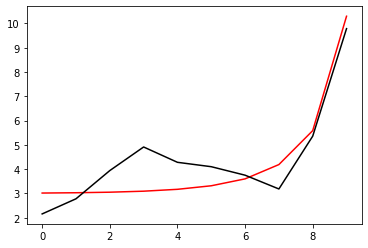

9447 0.013289711985627728
[2.15694297 2.77702522 3.93728133 4.90704314 4.2781022  4.09856205
 3.7528976  3.19203524 5.37655275 9.7882313 ]


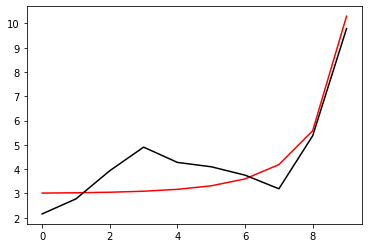

9648 1.0141918434080925
[2.15884288 2.77626583 3.93393273 4.9017999  4.27521539 4.09692781
 3.75522708 3.20119567 5.394765   9.78907197]


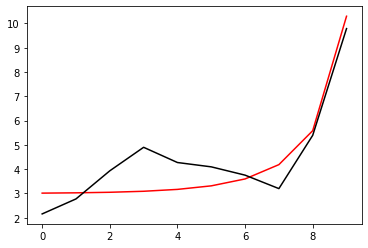

9849 0.0062298337255726945
[2.16078347 2.7755499  3.93061838 4.89657558 4.27233566 4.09526779
 3.75748321 3.21022477 5.41278782 9.78990364]


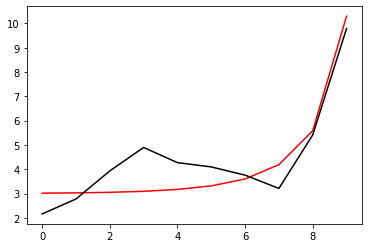

In [184]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, Positive[i%set], Negative[i%set]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.008277457495384433
[2.17097149 2.7830411  3.93503645 4.89889991 4.28094439 4.1065913
 3.77599462 3.24038897 5.45680708 9.79196686]


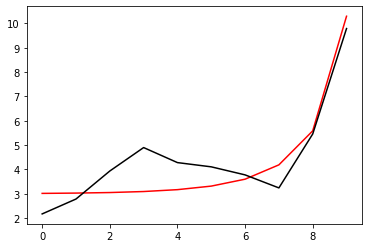

402 0.016409795421131076
[2.17302916 2.78257879 3.93214227 4.8942732  4.27860856 4.10538008
 3.77830155 3.24879584 5.47358165 9.7926886 ]


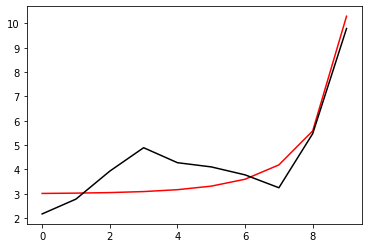

603 0.013392689506189166
[2.17507494 2.7819862  3.92896265 4.8891937  4.27578237 4.10361917
 3.78012591 3.2569326  5.49036466 9.79345411]


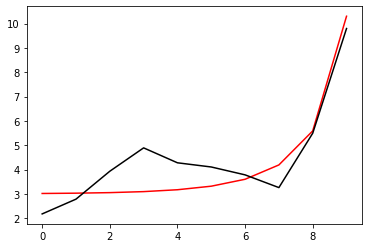

804 0.025370155594697043
[2.17712382 2.78136066 3.92569187 4.88395554 4.27278364 4.10165371
 3.78176074 3.26495071 5.50711355 9.79421726]


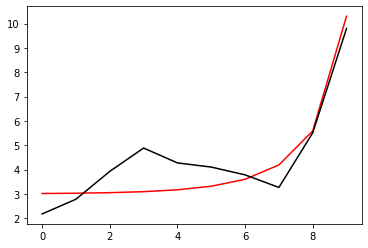

1005 0.025636571757973466
[2.17916757 2.78071769 3.92237529 4.87863678 4.26969983 4.09958175
 3.78328755 3.27288352 5.52379588 9.7949784 ]


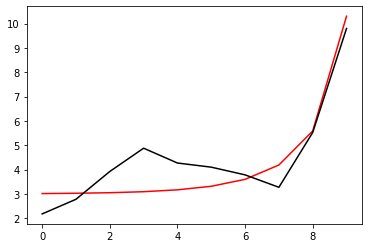

1206 0.02935663176580871
[2.18119567 2.78005584 3.91902366 4.87326231 4.26656046 4.09743813
 3.78473447 3.28073841 5.54039112 9.79574134]


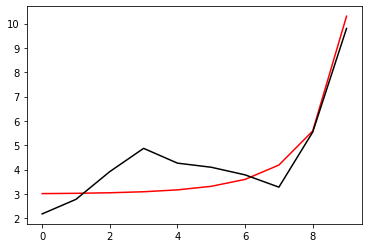

1407 0.014788738602184758
[2.18323047 2.77940535 3.91567677 4.8678825  4.26342141 4.09528373
 3.78615982 3.28856191 5.55692791 9.79650489]


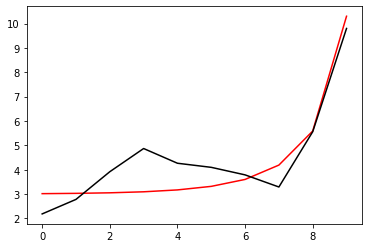

1608 0.030626994618682284
[2.18523296 2.77872636 3.91229564 4.86246096 4.26024744 4.09308562
 3.78753087 3.29631913 5.57336976 9.79726602]


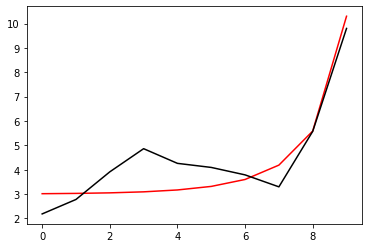

1809 0.008943629984187691
[2.18724937 2.77807133 3.90893925 4.8570633  4.25710861 4.09091698
 3.78891976 3.30407597 5.58977173 9.798022  ]


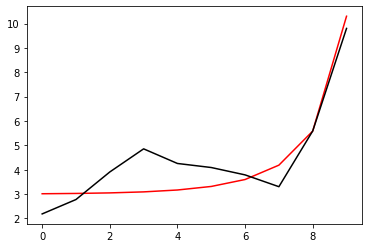

2010 0.018817718022529472
[2.1892562  2.77741515 3.9055818  4.85166411 4.25397991 4.08875387
 3.79030333 3.31180987 5.60611318 9.79877189]


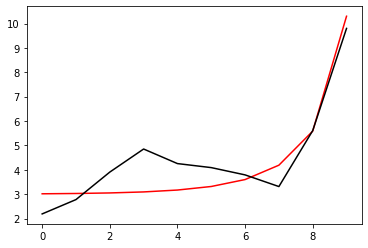

2211 0.012264944885011614
[2.19126524 2.77677155 3.9022394  4.84628227 4.25088257 4.0866195
 3.79170529 3.31954332 5.62241409 9.79951615]


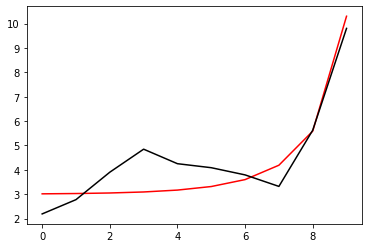

2412 0.018390459461914966
[2.19326133 2.77612408 3.89889489 4.84090072 4.24779993 4.08449806
 3.7931108  3.32726273 5.63866329 9.80025615]


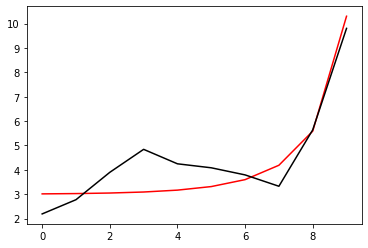

2613 0.00858006048849088
[2.19526395 2.77549449 3.89557242 4.83554617 4.244761   4.08242025
 3.79455113 3.33499851 5.65488887 9.80099351]


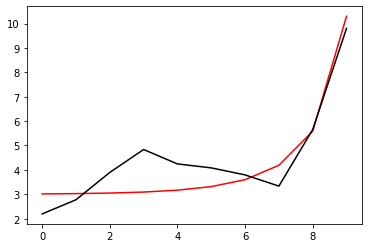

2814 0.01384547157223583
[2.19725938 2.7748678  3.89225622 4.83020275 4.24175021 4.08037122
 3.79601251 3.34273857 5.67108163 9.80172985]


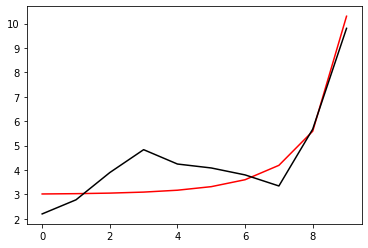

3015 0.007424166078144398
[2.19926096 2.77425862 3.88896226 4.82488788 4.23878635 4.07837084
 3.79751524 3.35050301 5.68726077 9.80246644]


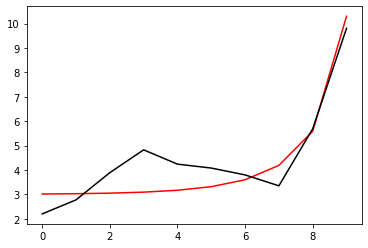

3216 0.012312369274273913
[2.20125604 2.77365298 3.88567562 4.81958631 4.23585422 4.07640443
 3.7990457  3.35828005 5.70341763 9.80320414]


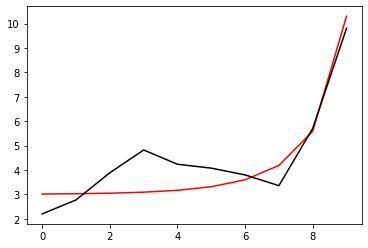

3417 1.0118656630826997
[2.20324556 2.77305186 3.88239748 4.81429964 4.23295596 4.07447471
 3.80060717 3.36607363 5.71955698 9.8039433 ]


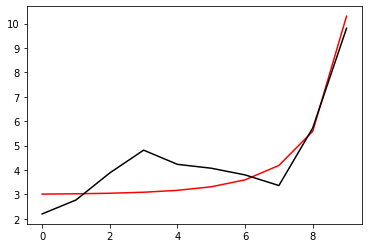

3618 0.006675914549935472
[2.20523905 2.77246582 3.8791395  4.8090408  4.2301056  4.0725967
 3.80221526 3.37389961 5.73569449 9.8046838 ]


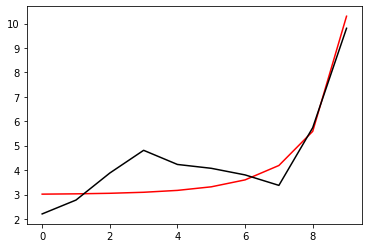

3819 0.013755179694012017
[2.20721803 2.77187455 3.87587998 4.80378723 4.22728022 4.07074787
 3.80384871 3.38173921 5.75181547 9.80542525]


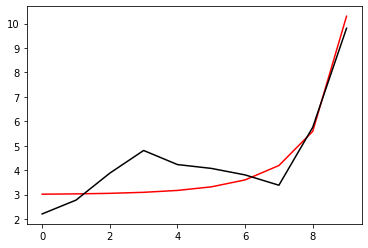

4020 0.013904096356831472
[2.20918323 2.77127874 3.87261964 4.79853994 4.22448104 4.06892983
 3.80550957 3.38959514 5.76792359 9.80616703]


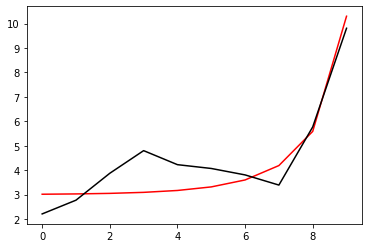

4221 1.0227505856834678
[2.21111119 2.77065292 3.86933155 4.79327109 4.22167989 4.06711501
 3.80717186 3.39744443 5.78400058 9.80690841]


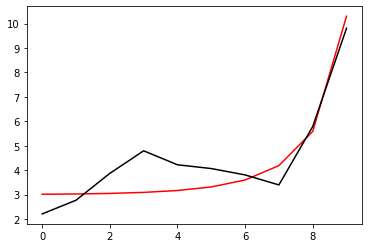

4422 0.011150135256213622
[2.21303167 2.77002976 3.8660509  4.78801815 4.21891565 4.06534312
 3.80887504 3.40532502 5.80008111 9.80764856]


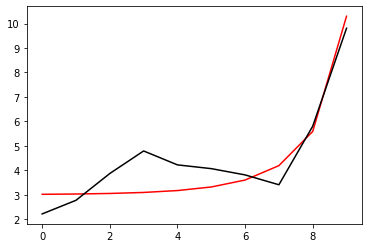

4623 1.976388082300049
[2.21500127 2.76947296 3.86284821 4.782858   4.21627063 4.06370089
 3.81070841 3.41332626 5.81625092 9.80838704]


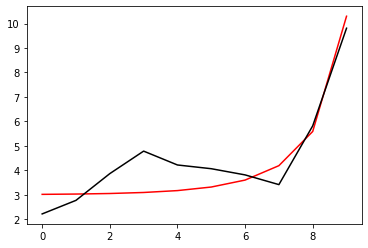

4824 1.0070264563357265
[2.21696728 2.76892296 3.85965749 4.77771877 4.2136676  4.06210722
 3.81258893 3.42136613 5.83243302 9.80912461]


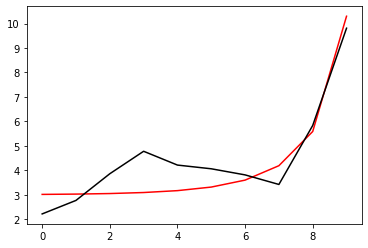

5025 1.0216136294692795
[2.21889229 2.76833887 3.85643497 4.7725546  4.21105923 4.0605148
 3.81447087 3.42940259 5.84859174 9.80986227]


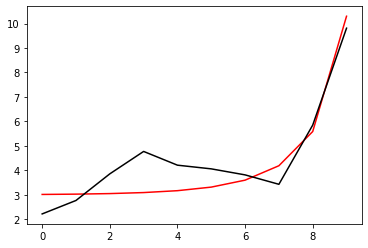

5226 0.0053035228934058595
[2.22081876 2.76776725 3.85323074 4.76741845 4.20850011 4.05897893
 3.8164087  3.43748742 5.86477352 9.81060067]


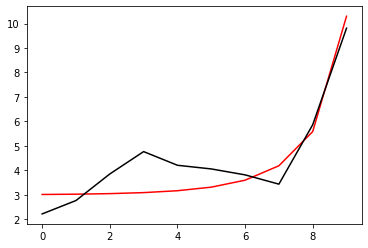

5427 0.008026357509535478
[2.22273784 2.76719851 3.85003471 4.76229995 4.20597955 4.05748932
 3.81839305 3.44561296 5.88097326 9.8113405 ]


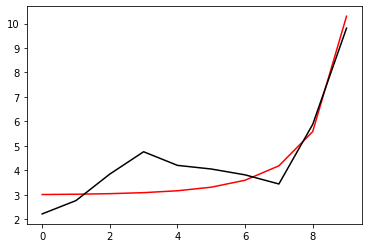

5628 0.007313435289568559
[2.22465018 2.76663348 3.84684789 4.75720037 4.20349874 4.05604751
 3.82042591 3.45378192 5.89719453 9.81208221]


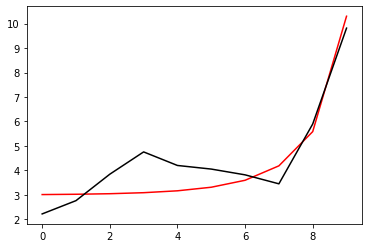

5829 0.007516456370152815
[2.22655436 2.76607062 3.84366876 4.75211828 4.20105605 4.0546522
 3.82250652 3.4619945  5.91343877 9.81282607]


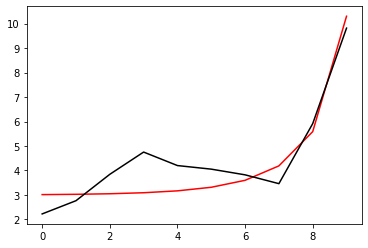

6030 0.00904513700406127
[2.22844635 2.76550556 3.84049265 4.74704882 4.19864615 4.05329822
 3.82463024 3.47024711 5.92970396 9.81357209]


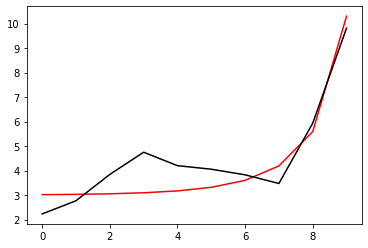

6231 2.009000759497326
[2.230325   2.7649372  3.83731863 4.74199129 4.19626824 4.05198525
 3.82679743 3.47854119 5.94599283 9.81432003]


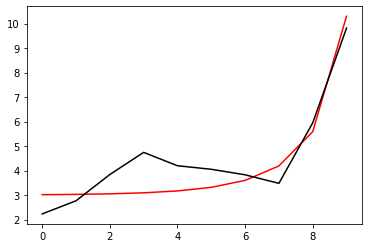

6432 0.007380656556713532
[2.23219563 2.76437132 3.83415289 4.7369522  4.19392863 4.05071978
 3.82901478 3.48688373 5.96231254 9.81506953]


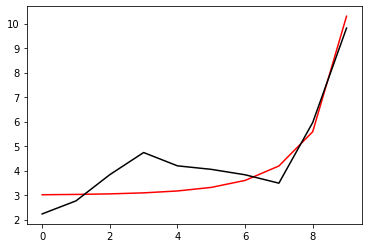

6633 0.006460526993661504
[2.23405873 2.76380865 3.83099644 4.73193283 4.19162849 4.04950341
 3.83128446 3.49527777 5.97866706 9.81582025]


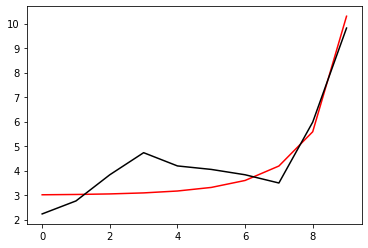

6834 0.010502072974931755
[2.23590391 2.76323774 3.82783694 4.72692019 4.18935397 4.04832238
 3.83359344 3.50371196 5.99504762 9.81657198]


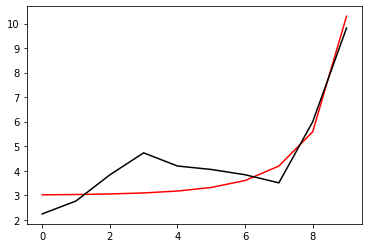

7035 0.011489515477437743
[2.23772622 2.7626535  3.82466933 4.7219093  4.18709994 4.04717211
 3.83593812 3.51218416 6.01145389 9.81732456]


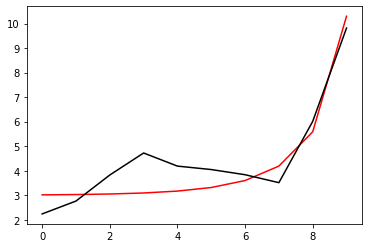

7236 0.019729089089939388
[2.23951329 2.76204224 3.82147893 4.71688485 4.1848504  4.04603719
 3.83830466 3.52068351 6.02787948 9.81807796]


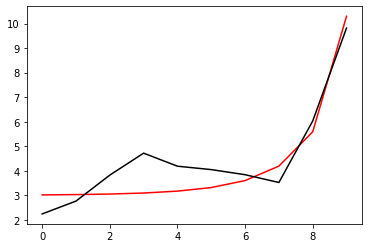

7437 1.0092266343084126
[2.2412871  2.76142813 3.81829165 4.71187395 4.1826326  4.04494474
 3.84071916 3.52923402 6.04434441 9.81883215]


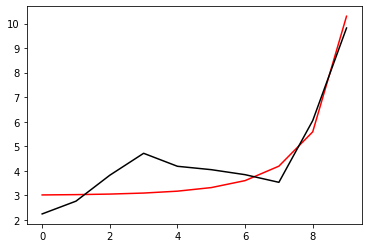

7638 0.005999730714748112
[2.24305535 2.76081965 3.81511667 4.7068863  4.18045616 4.04390473
 3.84319189 3.53784619 6.06085903 9.81958733]


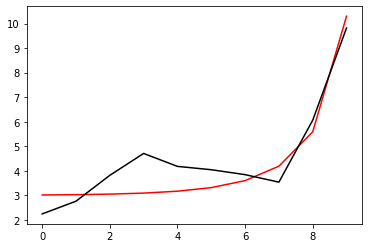

7839 0.022017066370000574
[2.24477261 2.7601691  3.81190557 4.7018745  4.17827634 4.04287845
 3.84569379 3.54650511 6.07742768 9.82034395]


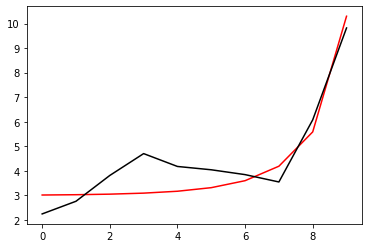

8040 0.008920452535513351
[2.24648209 2.75952137 3.80870335 4.69688172 4.17613184 4.04189796
 3.848247   3.5552191  6.09403961 9.82110263]


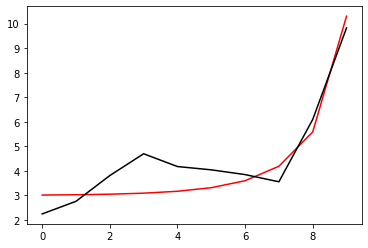

8241 0.009591460319439304
[2.24818047 2.75887289 3.80550632 4.6919042  4.17401851 4.04095958
 3.85084888 3.56398715 6.1106958  9.8218639 ]


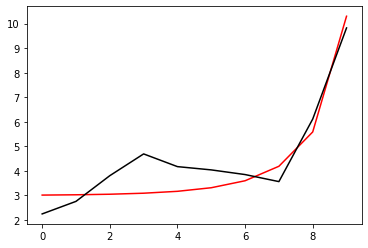

8442 0.007553692785858448
[2.24987193 2.75822834 3.80231965 4.68694749 4.17194182 4.04006934
 3.85350613 3.57281684 6.12740443 9.82262813]


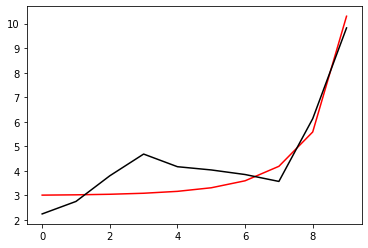

8643 0.8715805923293539
[2.25147551 2.75751433 3.79908301 4.68197118 4.16988846 4.03925179
 3.8562944  3.5818519  6.14439886 9.82339555]


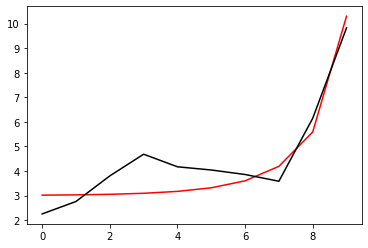

8844 0.01764934523241412
[2.25306158 2.75679266 3.79584481 4.6770042  4.16786089 4.03847502
 3.85913662 3.59095595 6.1614637  9.82416846]


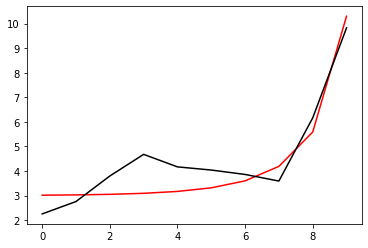

9045 0.0045438761127928875
[2.25465148 2.75608582 3.79262772 4.67206792 4.1658771  4.03775216
 3.86203861 3.60012452 6.17858036 9.82494854]


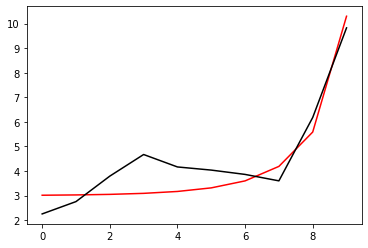

9246 0.005786807883877196
[2.25624281 2.75539132 3.78942932 4.66716014 4.16393496 4.0370822
 3.86500118 3.60936108 6.19575543 9.82573642]


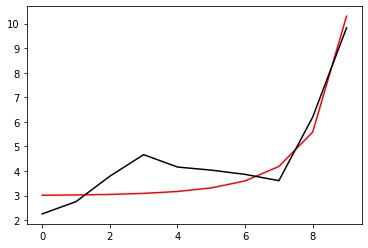

9447 0.010121172822236332
[2.2578196  2.75469149 3.78623053 4.66226057 4.16201289 4.03644345
 3.86800346 3.61864668 6.21297259 9.82653166]


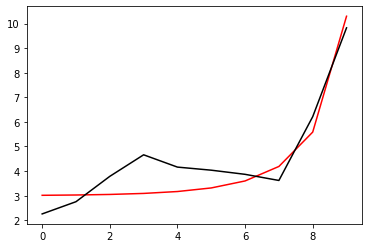

9648 1.010166880829031
[2.25937937 2.75398382 3.78302895 4.65736699 4.16010863 4.03583451
 3.87104547 3.62798331 6.23023583 9.82733273]


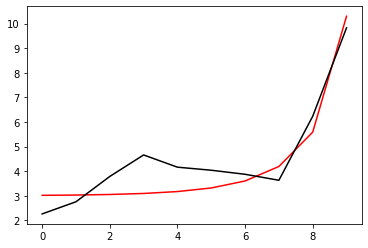

9849 0.004652136636876439
[2.26093898 2.75328647 3.77984383 4.65249943 4.15824223 4.03527585
 3.87414791 3.63739158 6.24756446 9.82813745]


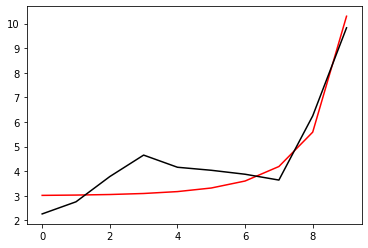

In [185]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, Positive[i%set], Negative[i%set]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.006121993369886326
[2.26996692 2.76048016 3.7841787  4.65504806 4.16772414 4.04811203
 3.89367892 3.66620442 6.28592473 9.82992552]


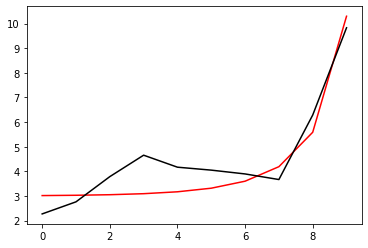

402 0.011549340918342862
[2.27153039 2.76033862 3.78213173 4.65170625 4.16672453 4.04816843
 3.89668299 3.67437322 6.30073153 9.83058468]


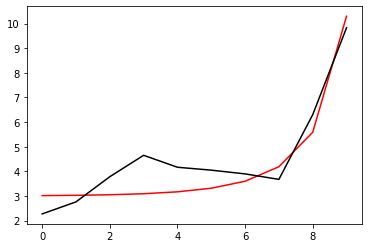

603 0.010161711506525641
[2.27296366 2.75980582 3.7794147  4.64750353 4.16512492 4.04773149
 3.89951912 3.68292258 6.3165148  9.8313054 ]


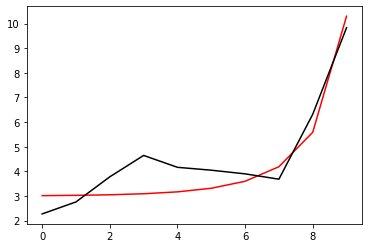

804 0.01810643808123385
[2.27437623 2.75912983 3.77642127 4.64293511 4.16328787 4.0471152
 3.9023393  3.6917255  6.33282741 9.83204066]


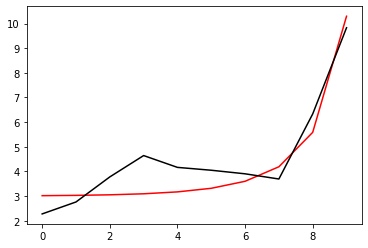

1005 0.018841185755540696
[2.27577986 2.75838204 3.77328515 4.63817843 4.16133717 4.04642446
 3.90518285 3.70070908 6.3494717  9.83279274]


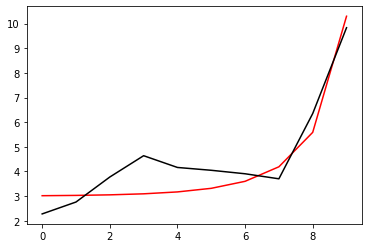

1206 0.022360145347774953
[2.27716405 2.75758074 3.77005497 4.63330355 4.15931674 4.04569433
 3.90805357 3.70982384 6.36634003 9.83356431]


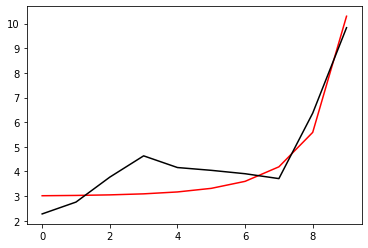

1407 0.011068195511033573
[2.27855417 2.75677041 3.76679481 4.62838882 4.15729245 4.0449869
 3.91099621 3.71908347 6.38340973 9.83435144]


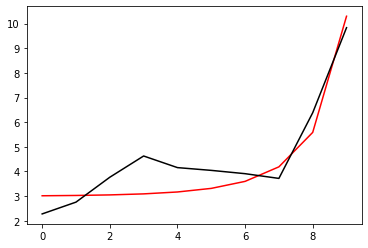

1608 0.02179230377574812
[2.27990957 2.75591701 3.76347852 4.62341394 4.15523527 4.04427123
 3.91397214 3.72843624 6.40061611 9.83514867]


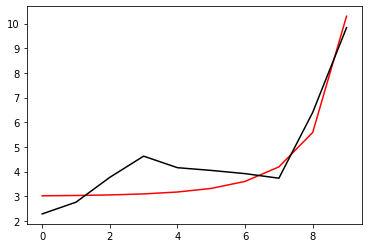

1809 0.0065310021991457625
[2.28127815 2.75507799 3.76017276 4.61845221 4.15321433 4.04361478
 3.91704098 3.73792724 6.41798502 9.83595131]


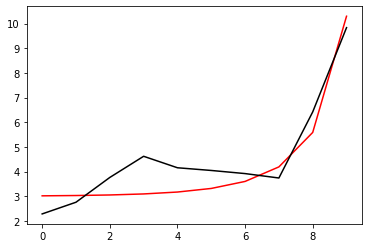

2010 0.013498751023429345
[2.28263477 2.75422951 3.7568558  4.61348335 4.15120506 4.04299207
 3.92017468 3.74752435 6.43548061 9.83675677]


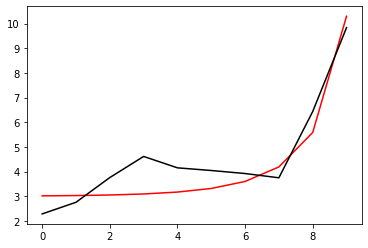

2211 0.008885559182657914
[2.28399187 2.75338739 3.75354694 4.6085292  4.14922716 4.04242236
 3.92338983 3.75723894 6.45310688 9.83756418]


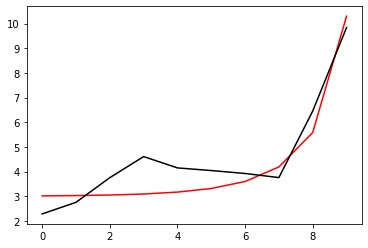

2412 0.013367440461401866
[2.28533313 2.75253524 3.75023019 4.60357401 4.1472624  4.04188703
 3.92666705 3.76705058 6.47084234 9.83837391]


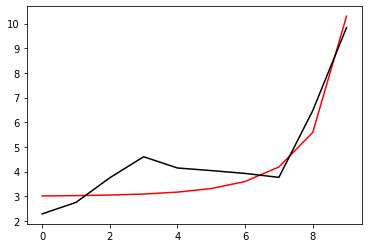

2613 0.006095818571791491
[2.28668036 2.75169751 3.74693259 4.59864663 4.14533871 4.04141384
 3.9300325  3.77698188 6.48870353 9.8391869 ]


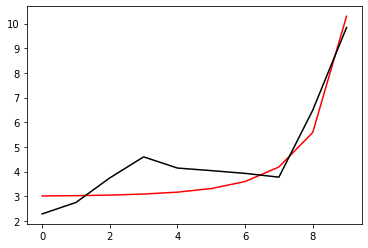

2814 0.010039167397011923
[2.28801912 2.75085903 3.74363864 4.59373122 4.14343856 4.04098515
 3.93346864 3.78701564 6.50667343 9.84000438]


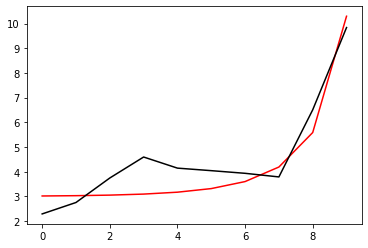

3015 0.00538136496544213
[2.28936395 2.7500356  3.74036531 4.5888455  4.14157871 4.0406175
 3.93699118 3.79716564 6.52476203 9.84082746]


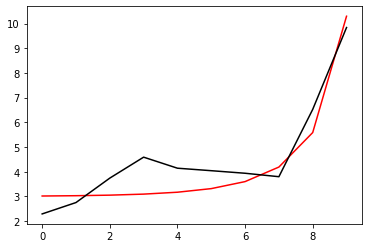

3216 0.008883342558353633
[2.2907023  2.74921356 3.73709825 4.5839744  4.13974269 4.04029431
 3.940584   3.80741676 6.54295497 9.84165701]


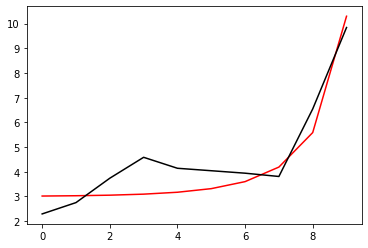

3417 1.0091174465214905
[2.29203427 2.74839282 3.73383723 4.57911746 4.13792884 4.04001366
 3.94424505 3.8177666  6.56124851 9.84249343]


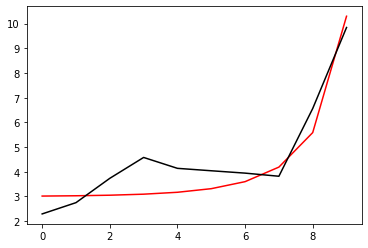

3618 0.0050769183166035955
[2.29337119 2.7475856  3.73059534 4.57428824 4.13615022 4.03978865
 3.94798712 3.8282269  6.57965143 9.84333658]


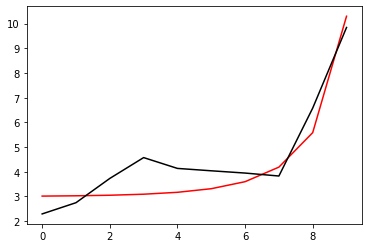

3819 0.009888925787279412
[2.29469589 2.74677305 3.72735245 4.56946553 4.13438428 4.03959674
 3.95178865 3.83877795 6.59814596 9.84418601]


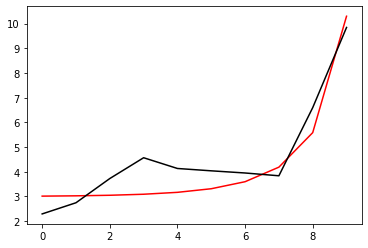

4020 0.010517476367856602
[2.29600832 2.74595472 3.72410774 4.56464801 4.13262859 4.03943515
 3.95564681 3.8494168  6.61672806 9.84504087]


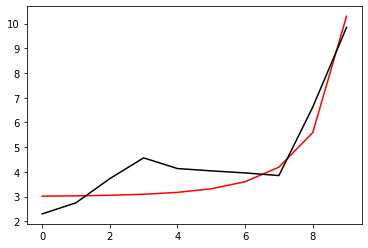

4221 1.0161891986821499
[2.29728815 2.74510847 3.72083775 4.55981112 4.13085745 4.03927843
 3.95953745 3.86012164 6.63537856 9.84590012]


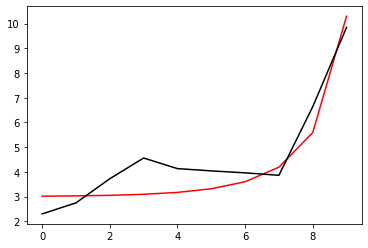

4422 0.007921157096243758
[2.29856583 2.74426693 3.71757686 4.55499028 4.12910608 4.03916137
 3.96349395 3.87092263 6.65412121 9.84676259]


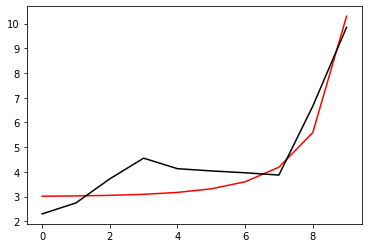

4623 1.967640769388777
[2.29992876 2.74352723 3.71443128 4.55029975 4.12749489 4.03920912
 3.96764298 3.8819425  6.67306654 9.84762739]


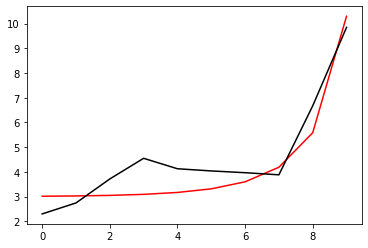

4824 1.0050497764837574
[2.30129129 2.74279337 3.71129537 4.54562491 4.12590105 4.0392932
 3.97185375 3.89305296 6.69209467 9.84849513]


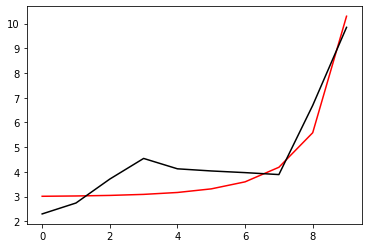

5025 1.0158694794764485
[2.30261744 2.74202597 3.70812697 4.54092128 4.1242782  4.03936708
 3.97608142 3.90421289 6.71116999 9.84936651]


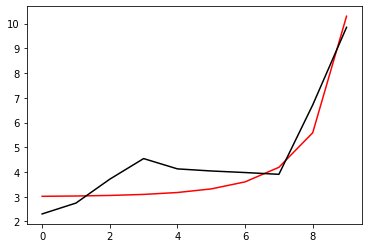

5226 0.0041094076503355855
[2.30394945 2.74127056 3.70497427 4.53623882 4.12267655 4.03948038
 3.98037329 3.91546444 6.73032552 9.85024186]


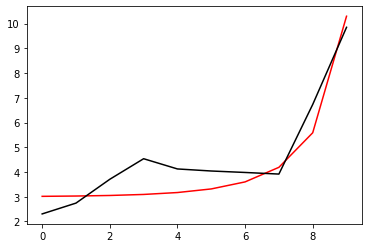

5427 0.0058549055618732845
[2.30528039 2.74051936 3.70182879 4.53156829 4.12108581 4.03962253
 3.9847189  3.92679749 6.74955119 9.85112136]


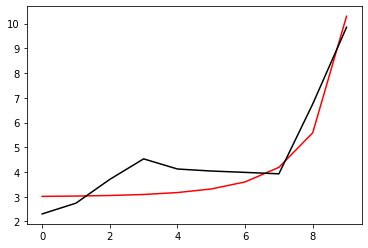

5628 0.005382580774553595
[2.30661151 2.73977343 3.69869145 4.52691026 4.11950574 4.0397928
 3.98911706 3.93821006 6.76884341 9.85200497]


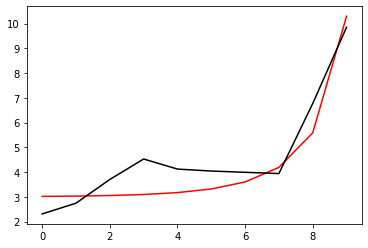

5829 0.005563244859428284
[2.30794226 2.73903191 3.69556105 4.52226306 4.1179337  4.03998802
 3.99356417 3.94969783 6.78819669 9.85289235]


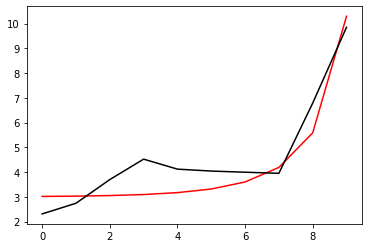

6030 0.007112249852578865
[2.30926844 2.73828981 3.69243193 4.5176202  4.11636202 4.04019982
 3.99805133 3.96125151 6.80760123 9.85378298]


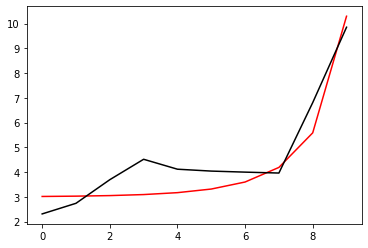

6231 2.006735851588991
[2.31059103 2.73754804 3.68930489 4.51298219 4.11479049 4.04042744
 4.00257721 3.97286879 6.82705335 9.85467614]


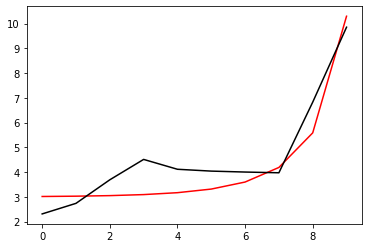

6432 0.005942828187326177
[2.31191484 2.73681145 3.68618476 4.50835354 4.11322269 4.04067361
 4.00714335 3.98454953 6.84655073 9.85557108]


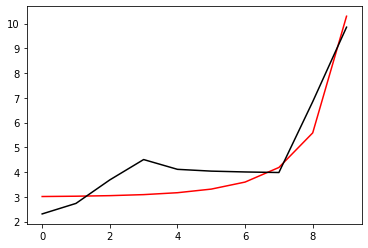

6633 0.005022606731620461
[2.31324186 2.73608209 3.68307358 4.5037361  4.11165977 4.04093882
 4.01174936 3.99629194 6.86608994 9.85646715]


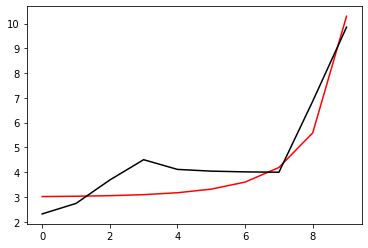

6834 0.008625923492400767
[2.31456163 2.73534812 3.67995825 4.49911545 4.11008584 4.04120614
 4.01637773 4.00807855 6.88565473 9.85736389]


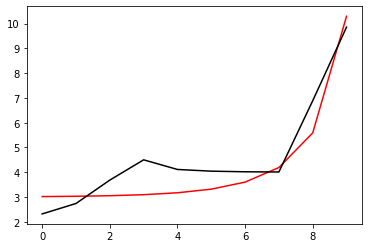

7035 0.008784043118568403
[2.31587235 2.73460751 3.67683657 4.49448909 4.10849769 4.04147176
 4.02102388 4.01990389 6.90523908 9.85826097]


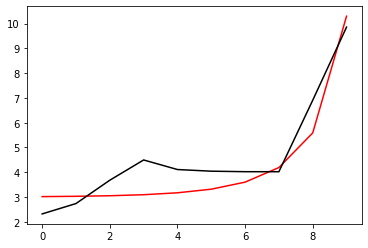

7236 0.01480188764287266
[2.31715976 2.73384419 3.67369076 4.4898376  4.10687422 4.04171343
 4.02566515 4.031746   6.9248237  9.85915819]


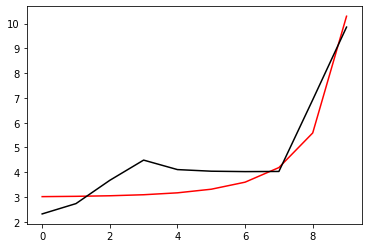

7437 1.0072048732820087
[2.31844875 2.73308529 3.6705498  4.48519118 4.10524583 4.04196067
 4.03032846 4.04362707 6.94442446 9.86005534]


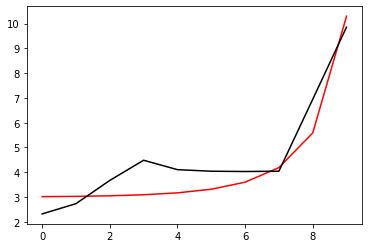

7638 0.004564786268067966
[2.3197475  2.73233964 3.66742303 4.48055936 4.10362163 4.04222164
 4.03502027 4.05555095 6.96404268 9.86095236]


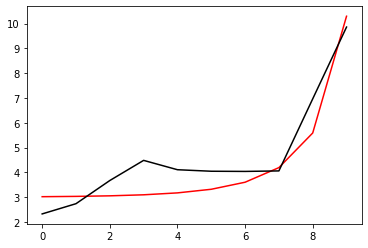

7839 0.010308733862730098
[2.32103768 2.73158698 3.66428847 4.47591859 4.10197665 4.04247045
 4.0397145  4.06749285 6.98365747 9.8618494 ]


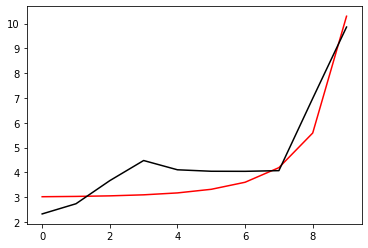

8040 0.007399284567761434
[2.32233114 2.73083995 3.66115931 4.47128219 4.1003236  4.04271839
 4.04441994 4.07945802 7.00327072 9.86274651]


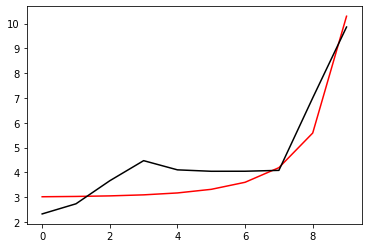

8241 0.0076742261916286445
[2.32362674 2.73009719 3.65803387 4.46664809 4.09865972 4.04296173
 4.04913156 4.09144018 7.02287631 9.86364369]


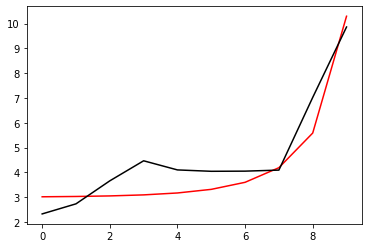

8442 0.005840070973745146
[2.32493013 2.72936485 3.65491871 4.46202295 4.09699139 4.04320587
 4.05385299 4.10344066 7.0424741  9.86454085]


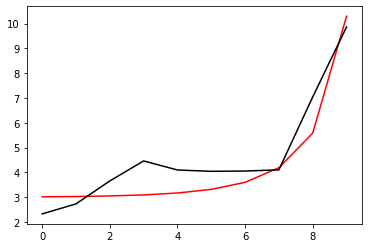

8643 0.5240815087517371
[2.32604644 2.72846374 3.65166341 4.45730322 4.09528413 4.04351583
 4.05878623 4.1158337  7.06262448 9.86543779]


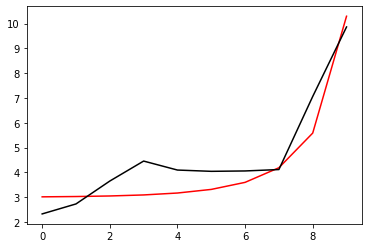

8844 0.006541426036451537
[2.32718789 2.72758832 3.64843022 4.45259902 4.09357137 4.04381449
 4.06370219 4.12819971 7.0827041  9.86633947]


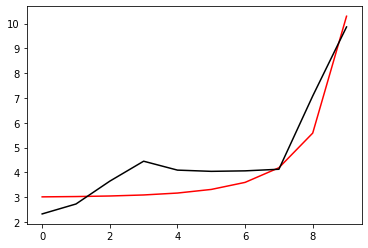

9045 0.0034620495771380483
[2.32836194 2.72674695 3.64522827 4.44792006 4.09186295 4.04411091
 4.06860807 4.1405435  7.10271678 9.86724872]


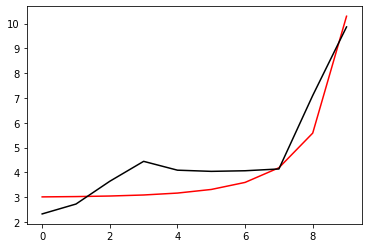

9246 0.003611915000054997
[2.32956631 2.72593736 3.64205532 4.44326413 4.09015667 4.0444025
 4.07350067 4.15286179 7.12266146 9.86816594]


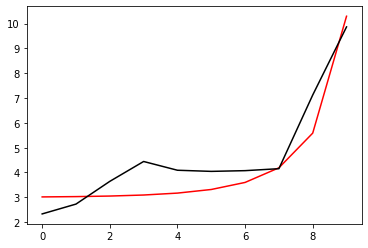

9447 0.008798644293797087
[2.33078373 2.72514052 3.63889075 4.43860926 4.08842957 4.04466543
 4.07835605 4.16513253 7.14252194 9.86908921]


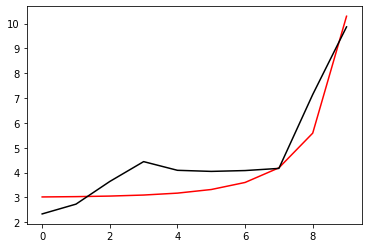

9648 1.0080019363233506
[2.33201441 2.72435705 3.63573557 4.43395692 4.08668353 4.04490144
 4.08317532 4.17735646 7.16230059 9.87001479]


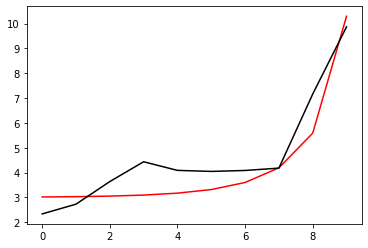

9849 0.0035522595296034595
[2.3332727  2.72360289 3.63260716 4.42932569 4.08493798 4.04512957
 4.08797576 4.18954803 7.18200982 9.8709381 ]


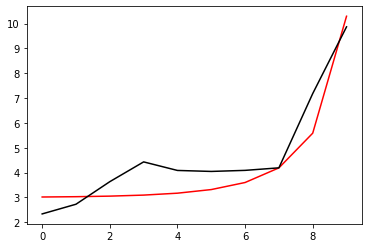

In [186]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, Positive[i%set], Negative[i%set]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.004738757475695654
[2.3407174  2.72961388 3.63586297 4.43104482 4.09373924 4.05957771
 4.10971227 4.22035425 7.21984176 9.87268957]


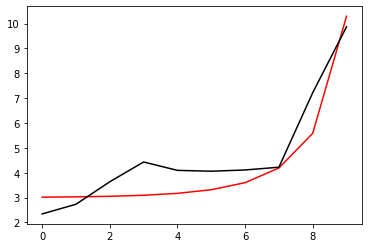

402 0.008252329993827624
[2.34190877 2.72930542 3.63377695 4.42784165 4.09271445 4.06004636
 4.11368558 4.23025854 7.23632541 9.87343507]


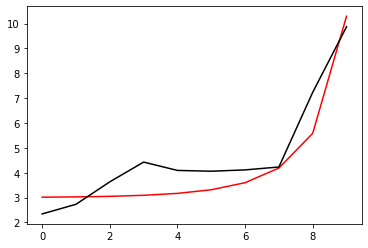

603 0.008290553688570198
[2.34309565 2.72874633 3.63115787 4.42390037 4.09114325 4.06009815
 4.11761498 4.24069376 7.25373373 9.87423567]


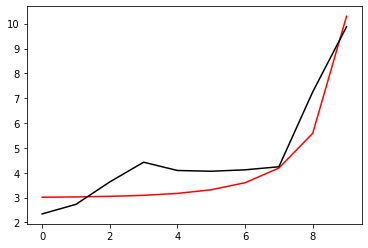

804 0.013354745929824016
[2.34431495 2.72809556 3.62830178 4.41961131 4.08930141 4.05993505
 4.12150744 4.25136601 7.27154599 9.87503872]


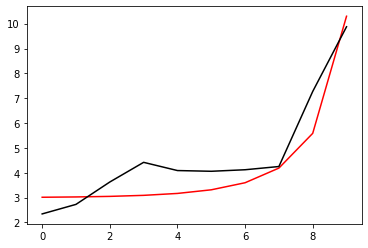

1005 0.014857846384693531
[2.34556332 2.72740496 3.62532229 4.4151328  4.087305   4.05964506
 4.12536978 4.26215921 7.28956318 9.87585078]


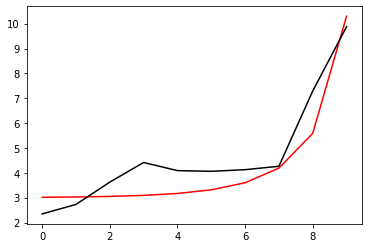

1206 0.019043351896612187
[2.34682197 2.72668286 3.62225843 4.41052682 4.08519633 4.05925713
 4.12919089 4.2730028  7.30767872 9.8766777 ]


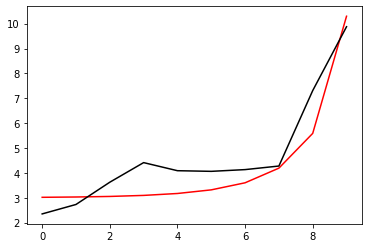

1407 0.008925829495918122
[2.34811141 2.72596893 3.61917092 4.40587074 4.08304542 4.05883552
 4.1330116  4.28389997 7.32586829 9.87751547]


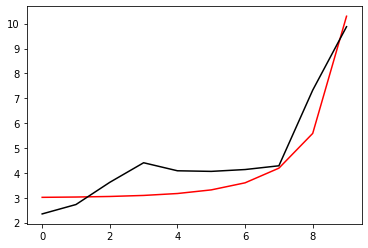

1608 0.01647347875424359
[2.349399   2.72523747 3.61604265 4.40115433 4.08083568 4.05835958
 4.13679909 4.29480124 7.34407677 9.87835798]


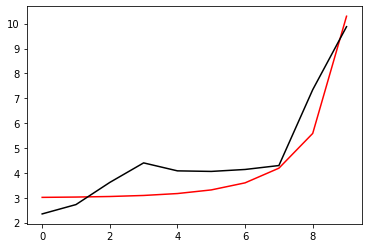

1809 0.004941339883706189
[2.35071992 2.72453342 3.61292882 4.39644118 4.07862961 4.05788966
 4.14060265 4.30573682 7.36231744 9.87920026]


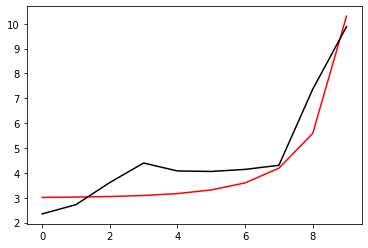

2010 0.010478034454139392
[2.35205187 2.72383618 3.60981136 4.39171533 4.07640816 4.0574046
 4.1443959  4.31667415 7.38055792 9.88003968]


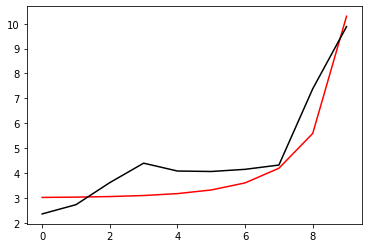

2211 0.006880925636258994
[2.35340379 2.72315843 3.60670703 4.38699702 4.07419102 4.05692301
 4.14819244 4.32761871 7.39879774 9.88087541]


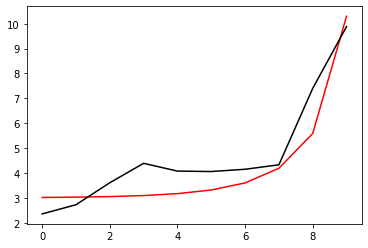

2412 0.010604336497928614
[2.35476044 2.72248519 3.60360161 4.3822727  4.07196305 4.05642851
 4.15197327 4.33854889 7.41701676 9.8817078 ]


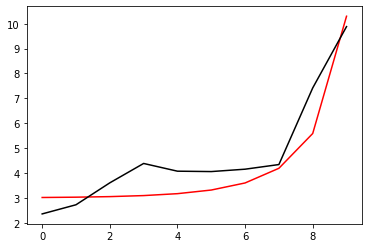

2613 0.0044688731711775495
[2.35614005 2.72183792 3.60051987 4.37757006 4.06975253 4.05594903
 4.15576291 4.34948296 7.43522727 9.88253765]


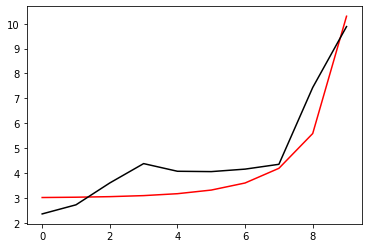

2814 0.007805272885952041
[2.35752922 2.72120283 3.59744792 4.37287525 4.06754463 4.05546896
 4.15954442 4.36040317 7.45341388 9.88336598]


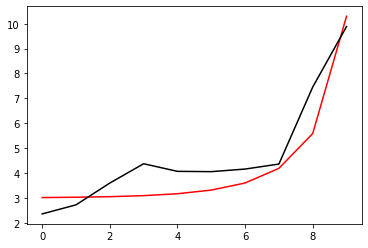

3015 0.0040305087551305765
[2.35893894 2.72059262 3.59440023 4.36820427 4.06535568 4.05500429
 4.16333164 4.37131975 7.47158378 9.8841937 ]


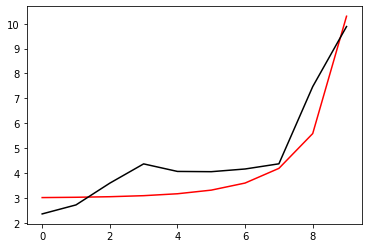

3216 0.006890441820320161
[2.36035794 2.71999532 3.59136436 4.36354439 4.06317224 4.05454101
 4.16710991 4.38221813 7.48972509 9.88502151]


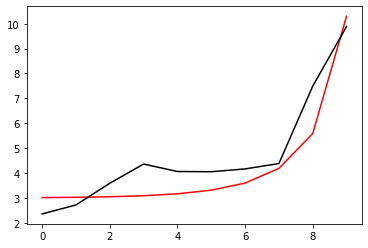

3417 1.0078094095542305
[2.36178343 2.71940809 3.58833754 4.35889299 4.06099131 4.05407561
 4.17087466 4.39309273 7.50783288 9.88584972]


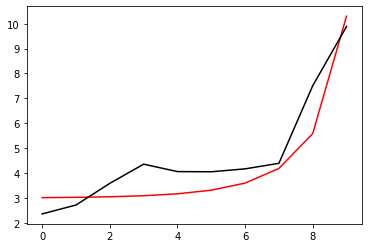

3618 0.0040594765560264005
[2.36322566 2.71884267 3.58533301 4.35426467 4.05882827 4.05362358
 4.17464018 4.40395546 7.52591676 9.88667824]


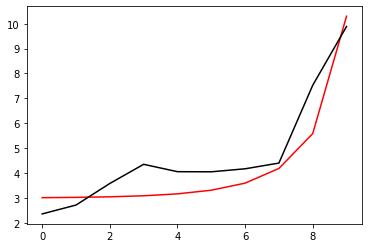

3819 0.0077041644814869
[2.36467037 2.7182836  3.58233431 4.3496423  4.05666535 4.05316691
 4.1783887  4.41479    7.54396429 9.88750674]


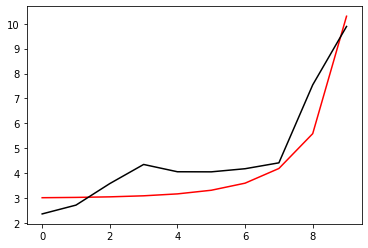

4020 0.00880531313509388
[2.36611483 2.71772793 3.57933839 4.34502278 4.05449926 4.05270202
 4.18211611 4.42559197 7.5619721  9.88833459]


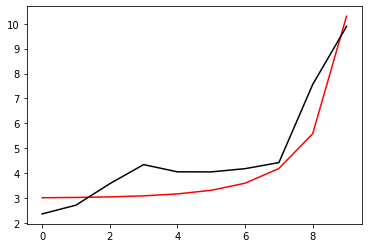

4221 1.0122997907207059
[2.36754313 2.71715857 3.57632727 4.34038761 4.05231125 4.05221041
 4.18580487 4.4363461  7.5799294  9.88916108]


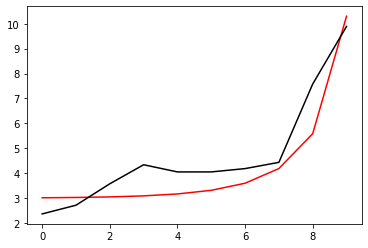

4422 0.005983088781459848
[2.36898029 2.71660314 3.57333094 4.33576885 4.05013462 4.05172546
 4.18948645 4.44707957 7.59785752 9.88998538]


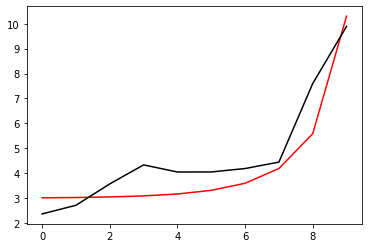

4623 1.9451500164811784
[2.37055782 2.71621057 3.57051547 4.331349   4.04816638 4.05145475
 4.19337115 4.45799272 7.61593247 9.89080695]


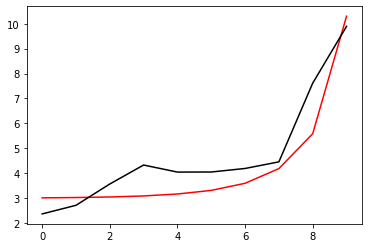

4824 1.0038748276663498
[2.37213877 2.71582577 3.56770799 4.32693817 4.04620132 4.0511816
 4.19723855 4.46887478 7.6339699  9.89162723]


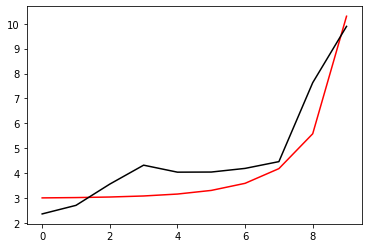

5025 1.0121298389036728
[2.37368896 2.71541142 3.56486855 4.32249447 4.04419648 4.05086341
 4.2010486  4.47969136 7.65194472 9.89244748]


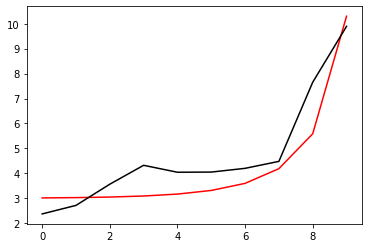

5226 0.0032687108817152062
[2.37524661 2.71500959 3.56204268 4.31806631 4.04220201 4.05055043
 4.20484886 4.49048375 7.66988889 9.89326829]


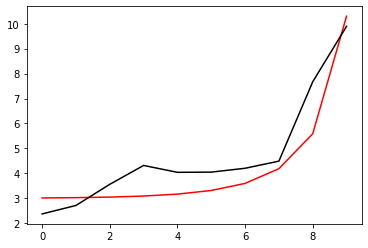

5427 0.004477348527336368
[2.37680602 2.71461419 3.55922408 4.31364735 4.04021158 4.05023659
 4.20863382 4.50124745 7.68779989 9.8940898 ]


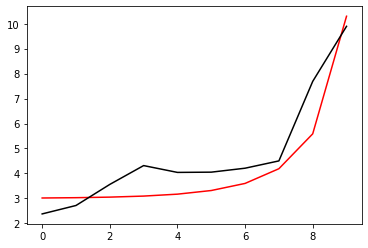

5628 0.004117791906290663
[2.37836762 2.71422587 3.55641368 4.30923887 4.03822673 4.04992373
 4.21240547 4.5119845  7.7056801  9.89491168]


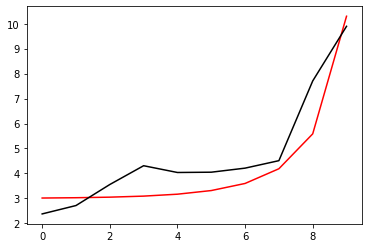

5829 0.004277843124106671
[2.37993035 2.71384359 3.55361058 4.3048402  4.03624694 4.0496116
 4.21616384 4.52269535 7.72353073 9.89573325]


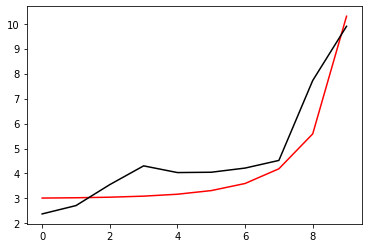

6030 0.00596918509309715
[2.38148841 2.71346104 3.55080813 4.3004445  4.03426518 4.04929334
 4.2199026  4.53337464 7.74134827 9.89655369]


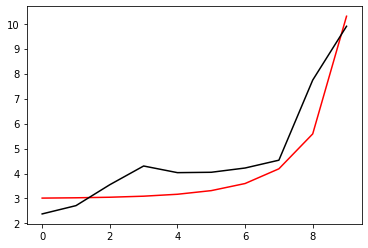

6231 2.005283441520071
[2.38304341 2.71308023 3.54800885 4.29605482 4.03228493 4.0489729
 4.22362606 4.54402685 7.75913734 9.89737215]


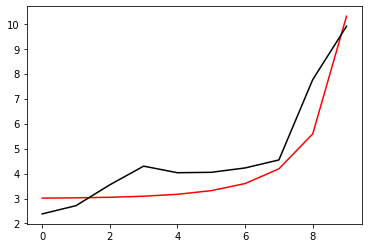

6432 0.005094911467799766
[2.38459816 2.71270418 3.54521604 4.29167479 4.03030986 4.04865412
 4.22733808 4.55465568 7.77690148 9.89818802]


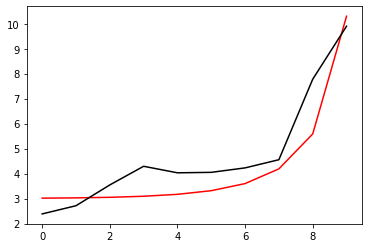

6633 0.004086412188530248
[2.38615418 2.71233486 3.54243226 4.28730754 4.0283435  4.04834106
 4.23104313 4.56526583 7.7946455  9.89900104]


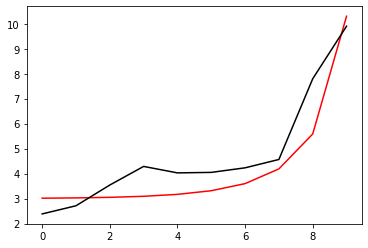

6834 0.007587893206011109
[2.38769947 2.71195912 3.53964342 4.28293834 4.02637059 4.04801862
 4.23472715 4.57584532 7.81236072 9.89981139]


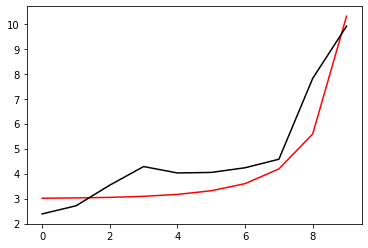

7035 0.007086172269778439
[2.38923368 2.71157694 3.53685005 4.27856828 4.02439266 4.04768903
 4.2383931  4.58639779 7.83005133 9.90061953]


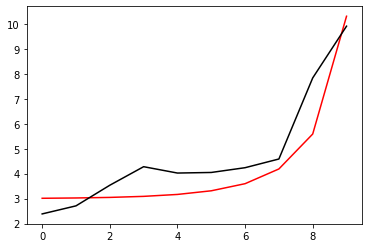

7236 0.012630675064224182
[2.3907398  2.71116962 3.53403209 4.27417629 4.02238779 4.04733053
 4.24202059 4.59690573 7.84770429 9.90142615]


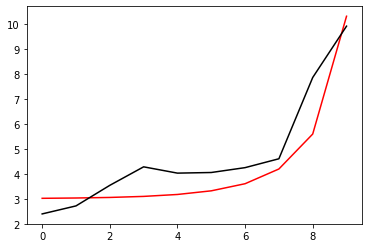

7437 1.0058282454169356
[2.39224291 2.71076489 3.53121978 4.26979473 4.02038967 4.04697747
 4.24564321 4.6073999  7.86534529 9.90223184]


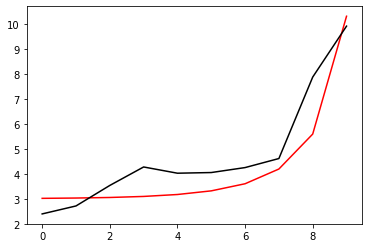

7638 0.003544724622375371
[2.39375038 2.71037096 3.52842225 4.26543356 4.01840864 4.04664069
 4.24927199 4.61789092 7.88298386 9.90303726]


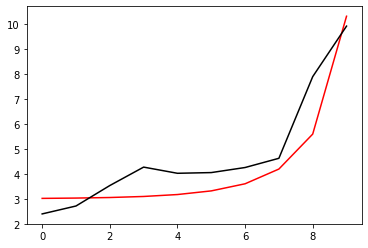

7839 0.00848637907580994
[2.39524394 2.70996788 3.52561829 4.26107063 4.01642183 4.04629763
 4.25288601 4.62836112 7.90060707 9.90384305]


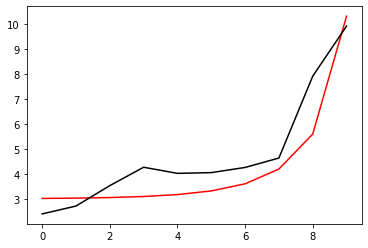

8040 0.006380539600273904
[2.39673249 2.70956543 3.52281861 4.25671746 4.01444106 4.04596052
 4.25649762 4.6388224  7.91822559 9.90464962]


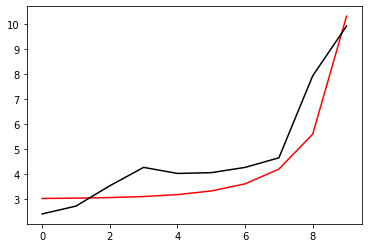

8241 0.006259581570236839
[2.39821534 2.70916299 3.52002288 4.25237402 4.01246641 4.04563005
 4.26010841 4.64927748 7.93584321 9.90545713]


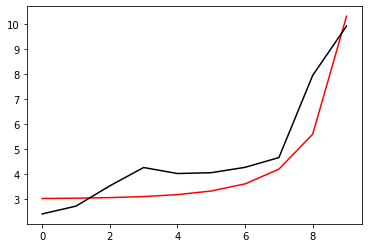

8442 0.004593112874551197
[2.39969775 2.70876646 3.51723778 4.24804771 4.01050555 4.04531443
 4.26372712 4.65973531 7.95346852 9.90626554]


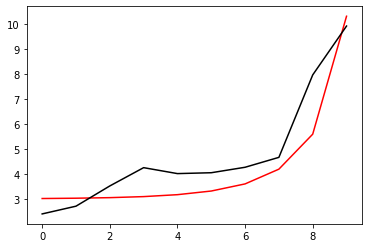

8643 0.15049081305354256
[2.40106575 2.70827221 3.51437734 4.24368028 4.00854056 4.04505508
 4.26747929 4.67043183 7.97146279 9.90707472]


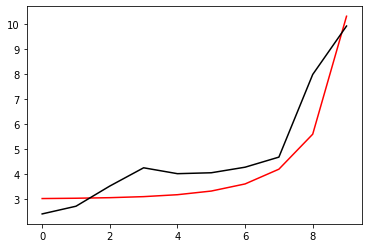

8844 0.004790147354182372
[2.40244663 2.70779573 3.51153738 4.23933638 4.00658993 4.04480382
 4.2712227  4.68110188 7.9894216  9.90788775]


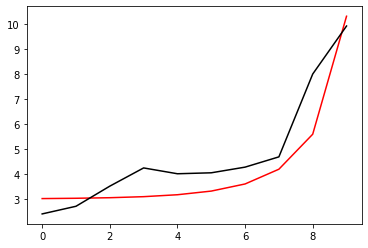

9045 0.0026701375276666677
[2.40384575 2.70734321 3.50872515 4.23502438 4.00466283 4.04457125
 4.27496975 4.6917597  8.00736042 9.90870621]


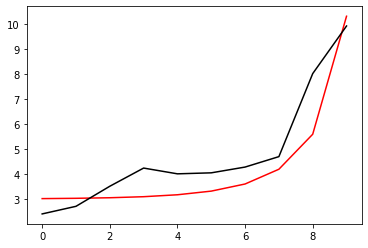

9246 0.0027151861683776084
[2.40526017 2.70691169 3.50593807 4.23074225 4.00275769 4.04435717
 4.27872248 4.7024104  8.02528747 9.90953021]


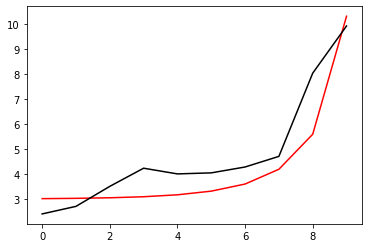

9447 0.007867332105111773
[2.40666962 2.70647921 3.50315301 4.22646613 4.00085022 4.04413847
 4.2824608  4.71303907 8.04319454 9.91035865]


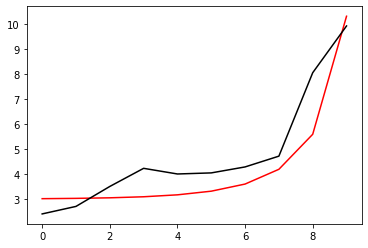

9648 1.0065121573562557
[2.40807628 2.70604856 3.50037373 4.22220083 3.99894603 4.04392226
 4.2861939  4.72365733 8.06109526 9.91118955]


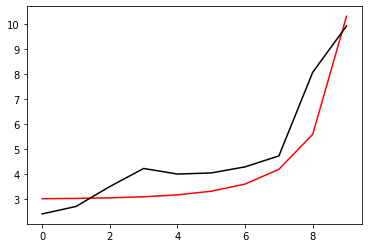

9849 0.0027460587467588037
[2.40949401 2.70563491 3.49761689 4.2179643  3.99706379 4.04372831
 4.28994259 4.73428658 8.07901039 9.9120207 ]


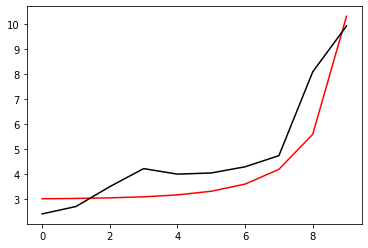

In [187]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, Positive[i%set], Negative[i%set]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.0035861237713764637
[2.41535091 2.70989412 3.49891062 4.21782717 4.00301436 4.05389638
 4.3079072  4.76421889 8.11948303 9.91388537]


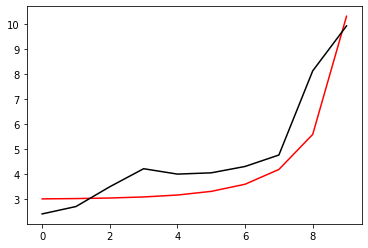

402 0.005826964650918252
[2.41673498 2.71009586 3.49752486 4.21537577 4.00213169 4.0541591
 4.31105913 4.77287278 8.13460462 9.9145824 ]


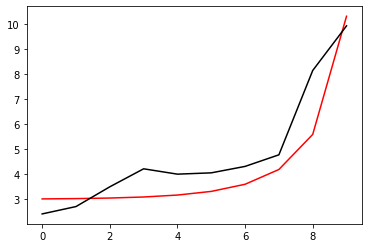

603 0.006499507438052053
[2.41788692 2.70980917 3.49535798 4.2119641  4.00050064 4.05383206
 4.31398189 4.78184884 8.15048734 9.91530957]


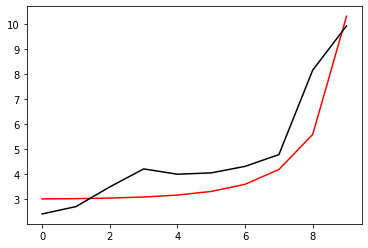

804 0.009582883755866096
[2.41908835 2.7094344  3.49294945 4.20822482 3.99866472 4.053397
 4.31699295 4.79119151 8.16693511 9.91604595]


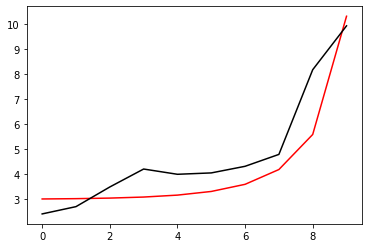

1005 0.011295696952246258
[2.42032222 2.70900641 3.49039426 4.20428951 3.99670761 4.05290483
 4.32007038 4.80077248 8.18374394 9.91680453]


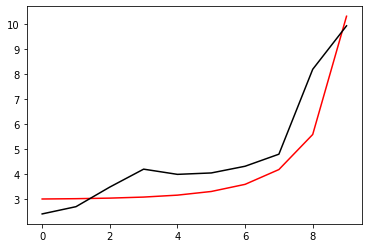

1206 0.015335222179132761
[2.42156356 2.70852971 3.4877303  4.2002159  3.99466078 4.05236973
 4.32319125 4.81051738 8.20080617 9.91758601]


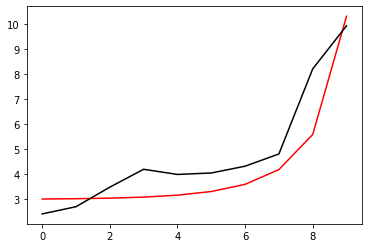

1407 0.00693340991200661
[2.4228291  2.70804288 3.48501992 4.1960812  3.99258788 4.05184635
 4.32638835 4.82042711 8.21809883 9.91838328]


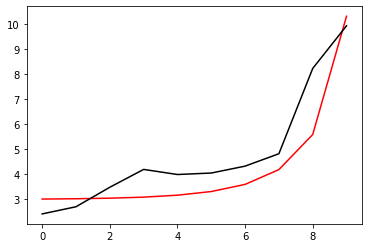

1608 0.012110553378735074
[2.4240896  2.70752756 3.48225726 4.19188686 3.99048028 4.05132043
 4.32963596 4.83046173 8.23557602 9.91919052]


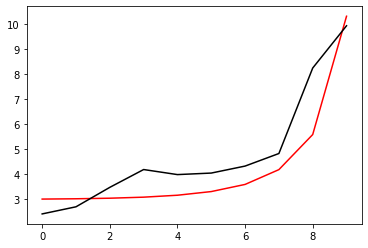

1809 0.0037646883984989383
[2.42537244 2.70702201 3.47949213 4.18768998 3.98838957 4.05083985
 4.3329725  4.84064563 8.25325023 9.92000448]


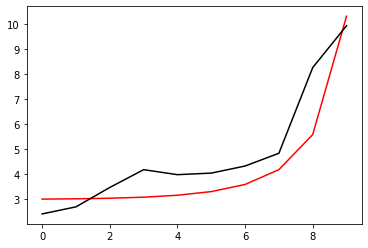

2010 0.00785310787326872
[2.42665646 2.70650924 3.47671274 4.18348166 3.98630159 4.05038807
 4.33637744 4.85095454 8.27109813 9.92082416]


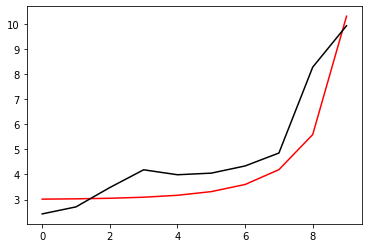

2211 0.0053194706517278555
[2.42794766 2.70599985 3.47393495 4.17928105 3.98423236 4.04997961
 4.33986191 4.86139533 8.28912405 9.92164967]


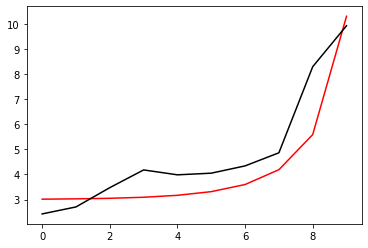

2412 0.008159618606658665
[2.42923111 2.70548055 3.47114796 4.1750787  3.98216933 4.04960101
 4.3434115  4.8719539  8.30731711 9.92248164]


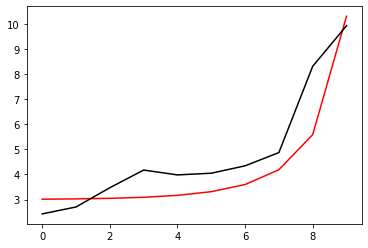

2613 0.0034668152187308132
[2.43052472 2.70497237 3.46837638 4.17090154 3.98013775 4.0492769
 4.34704914 4.88265098 8.32569584 9.92332078]


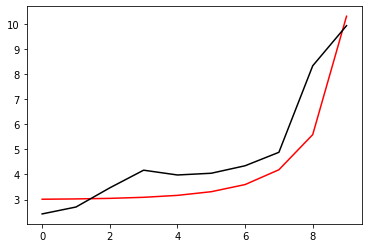

2814 0.006029004073581132
[2.4318136  2.70446091 3.46560704 4.16673707 3.97812313 4.04899271
 4.35076116 4.8934758  8.34425449 9.92416793]


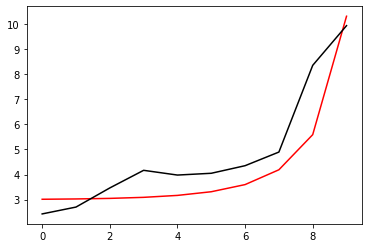

3015 0.0030424158457115504
[2.43310716 2.70395709 3.46285292 4.16259961 3.97613855 4.04876153
 4.35456073 4.9044424  8.36300811 9.9250239 ]


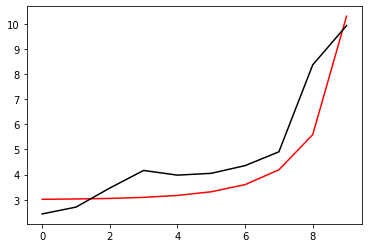

3216 0.005281345340816249
[2.43439519 2.70345036 3.46010388 4.15847912 3.97417225 4.04857167
 4.35843764 4.91554443 8.38195572 9.92588948]


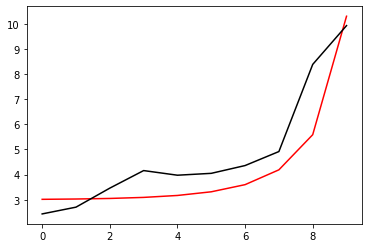

3417 1.0065704985159092
[2.43567301 2.70293586 3.45735551 4.15437132 3.97221842 4.04841741
 4.36238751 4.92678108 8.40110096 9.92676534]


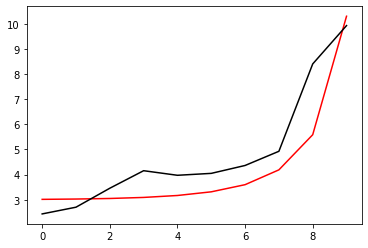

3618 0.0032648224552607585
[2.43695069 2.70242473 3.45462055 4.15029009 3.97029035 4.04831263
 4.36642559 4.93817029 8.42046389 9.92765195]


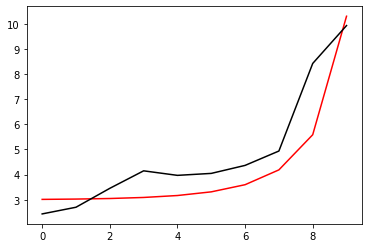

3819 0.005948240019408239
[2.43821607 2.70190386 3.45188571 4.1462219  3.96837311 4.04824288
 4.37053991 4.94970582 8.44004513 9.92854967]


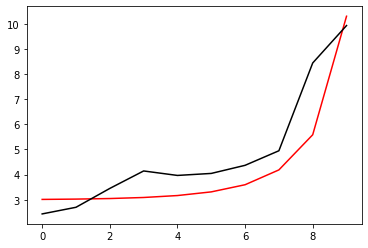

4020 0.007228933292057336
[2.43946533 2.7013689  3.44914678 4.14216247 3.96646112 4.04820289
 4.3747273  4.96138945 8.45985179 9.92945871]


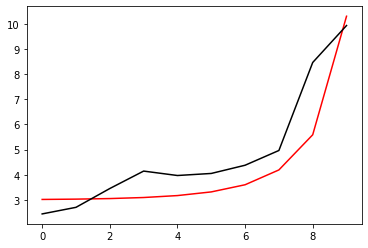

4221 1.007193574080894
[2.4406812  2.70080124 3.44638476 4.13809267 3.96453447 4.04817441
 4.3789743  4.97321717 8.47989086 9.93037914]


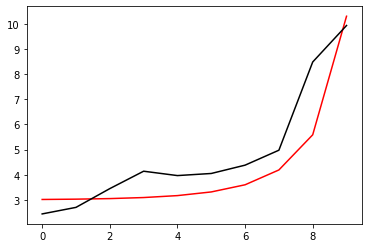

4422 0.004543825227994989
[2.44189123 2.70023017 3.44363092 4.13404493 3.96262482 4.04818867
 4.38331163 4.98521954 8.50018979 9.93131099]


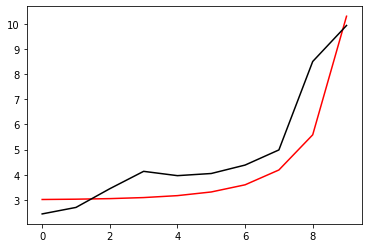

4623 1.917184775510856
[2.44328627 2.6998666  3.44111629 4.13026964 3.96099953 4.04852914
 4.38803495 4.99769482 8.5210292  9.93225447]


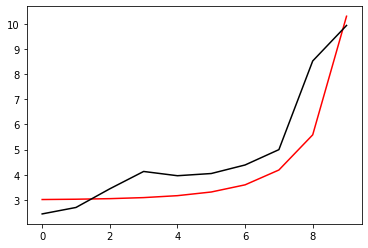

4824 1.0030384326486195
[2.44466113 2.69948282 3.43859193 4.12649725 3.9593689  4.04889042
 4.39283192 5.01034062 8.54213575 9.93321247]


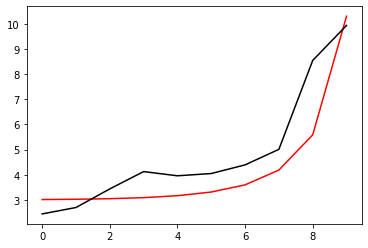

5025 1.0021707030887224
[2.4459592  2.69901861 3.43599568 4.1226648  3.95766988 4.04921385
 4.39765504 5.0231308  8.56350952 9.93418728]


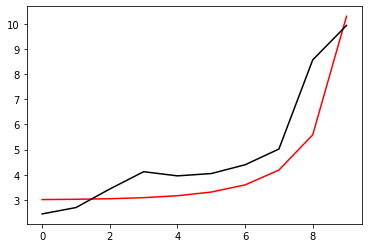

5226 0.0026677159990420893
[2.44724234 2.69853905 3.43339541 4.11884134 3.95596964 4.04956322
 4.4025623  5.03611469 8.58518348 9.93518013]


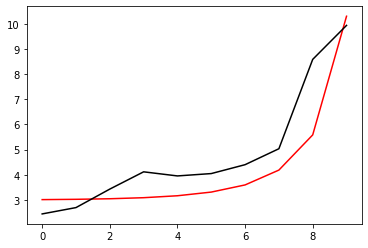

5427 0.0034959258340665432
[2.44850688 2.69803979 3.43078673 4.11502233 3.95426248 4.0499333
 4.40755151 5.04929761 8.60716914 9.93619133]


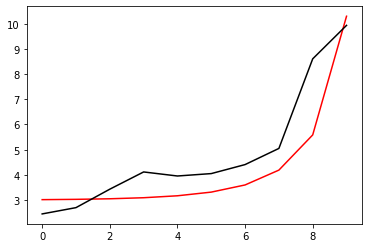

5628 0.0032335710129943423
[2.44975379 2.69752143 3.42817045 4.11120856 3.95254807 4.05032408
 4.4126254  5.06268935 8.62948117 9.93722035]


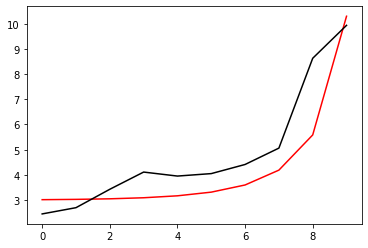

5829 0.003376093002111645
[2.45098294 2.69698326 3.4255459  4.10739921 3.95082433 4.05073362
 4.41778468 5.0762979  8.65213253 9.93826617]


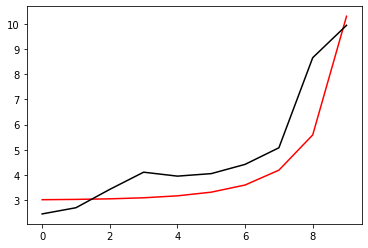

6030 0.005139274782885586
[2.45218927 2.69641927 3.42290665 4.10358722 3.94908257 4.05115296
 4.42302281 5.09012441 8.67512997 9.93932757]


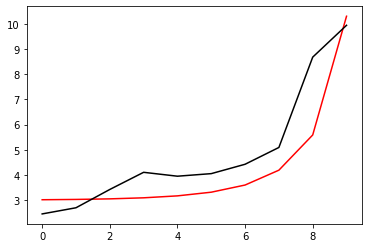

6231 2.004262183584429
[2.45337638 2.69583279 3.42025625 4.09977611 3.94732512 4.05158434
 4.42834422 5.10418016 8.6984881  9.94040345]


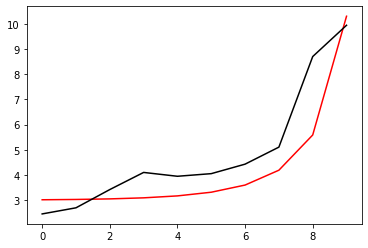

6432 0.004910806246945161
[2.45455059 2.69522919 3.41759952 4.09596985 3.94555401 4.05202867
 4.43375084 5.11847279 8.72221648 9.94149318]


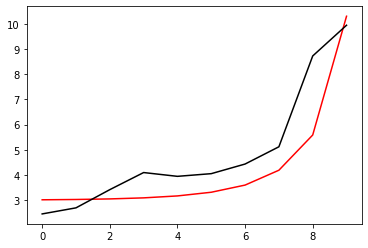

6633 0.0035131077946870324
[2.45571124 2.69460784 3.4149362  4.09216823 3.94376807 4.05248457
 4.4392432  5.13300976 8.74632522 9.94259673]


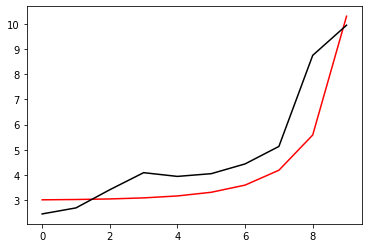

6834 0.007020960854115197
[2.45684897 2.69395786 3.41225422 4.08835778 3.9419515  4.05293457
 4.44480451 5.14778087 8.77080798 9.9437147 ]


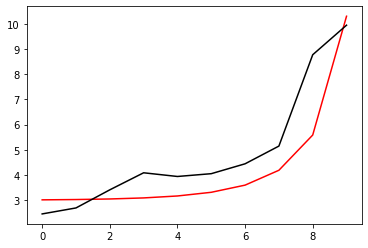

7035 0.006005579462087965
[2.45796768 2.69328285 3.40955706 4.08454152 3.94010595 4.05337907
 4.45043539 5.1627915  8.7956698  9.94484808]


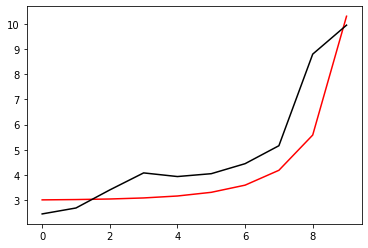

7236 0.01159859283893189
[2.45905486 2.69256835 3.40682845 4.08070107 3.93821021 4.05379402
 4.45611063 5.17802117 8.82089254 9.94599799]


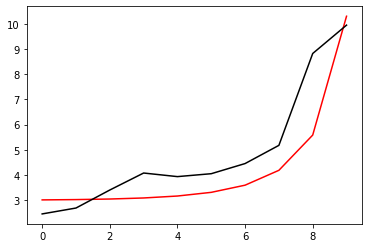

7437 1.004881777365157
[2.46013444 2.69183937 3.40409431 4.07686278 3.93629023 4.05420411
 4.46185358 5.19349373 8.84649213 9.94716527]


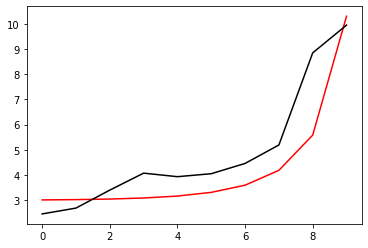

7638 0.002897578784307268
[2.46121509 2.69110429 3.40136252 4.07303367 3.93435157 4.05461249
 4.46766486 5.20920982 8.87246287 9.94835046]


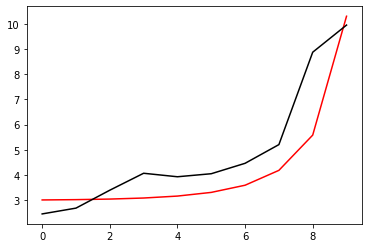

7839 0.007939890980185086
[2.46228644 2.69035065 3.39861832 4.06919639 3.93237403 4.05499486
 4.47351599 5.22514042 8.89877268 9.94955358]


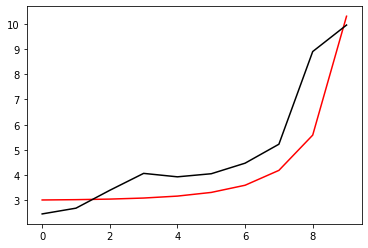

8040 0.006010832896843819
[2.4633571  2.6895868  3.39586931 4.06535739 3.93036277 4.05535321
 4.47940442 5.24127912 8.92540561 9.95077388]


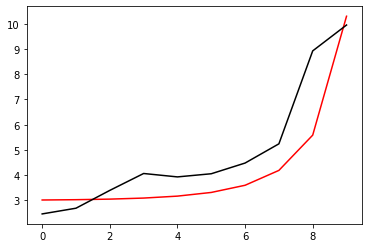

8241 0.005474888986024051
[2.46443143 2.68881629 3.39311767 4.06151721 3.9283168  4.05568284
 4.48531982 5.25760987 8.95233553 9.95200984]


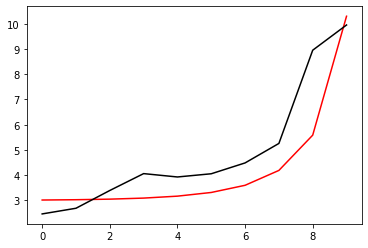

8442 0.003861229968266221
[2.46551743 2.68804653 3.39036951 4.05768032 3.92623936 4.05598316
 4.49125494 5.27411684 8.97953378 9.9532593 ]


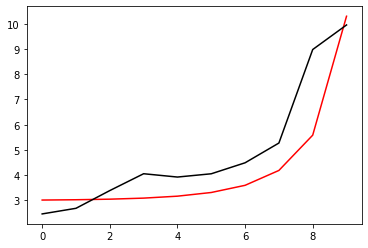

8643 0.0210284790513693
[2.46660787 2.68727053 3.38761787 4.05384052 3.92412712 4.05625338
 4.49721285 5.2908101  9.00701529 9.95451967]


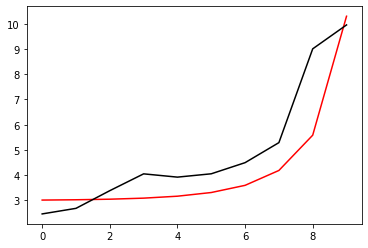

8844 0.004340008583492417
[2.46772058 2.68650312 3.38487296 4.05000202 3.92197747 4.05647766
 4.50315487 5.30761647 9.03467106 9.95578862]


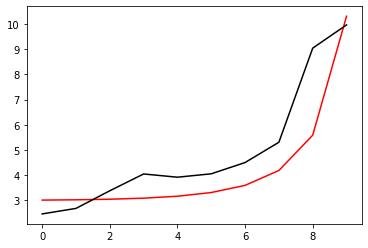

9045 0.002207812077310162
[2.46886243 2.68575059 3.38213944 4.04616782 3.91979309 4.05665502
 4.50907194 5.32451265 9.06246301 9.95706351]


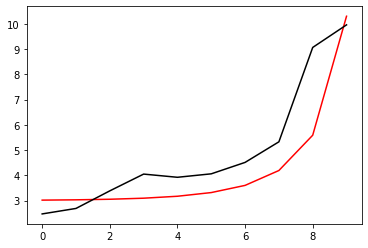

9246 0.0022317179143002156
[2.47003585 2.68501412 3.37941626 4.04233457 3.91757    4.05677741
 4.51494718 5.34146599 9.09034496 9.95834169]


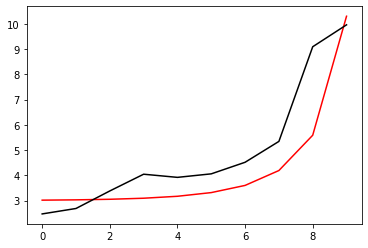

9447 0.008100863787325158
[2.47122935 2.68427976 3.37668594 4.03848137 3.91528567 4.05681705
 4.52074271 5.35842202 9.11825361 9.95962071]


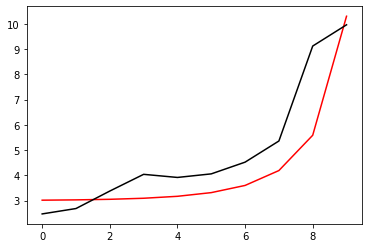

9648 1.0058936592516905
[2.4724514  2.68355528 3.37395448 4.03461257 3.91294503 4.05677602
 4.52645265 5.37535726 9.14615147 9.9608983 ]


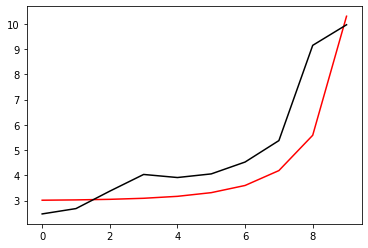

9849 0.002279434108152381
[2.47371514 2.68285329 3.3712328  4.0307377  3.91055861 4.0566626
 4.53207785 5.39225441 9.17400662 9.96217255]


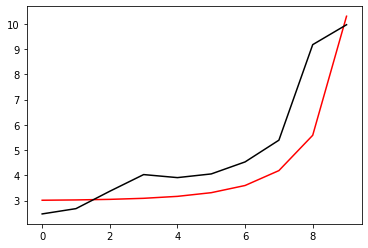

In [188]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, Positive[i%set], Negative[i%set]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.0028242557800181823
[2.47832436 2.68408053 3.36890463 4.02628925 3.90854007 4.05855413
 4.54408369 5.42417021 9.21729817 9.9641561 ]


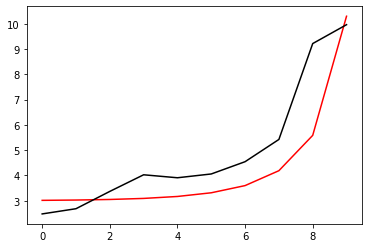

402 0.003977170409820725
[2.47975404 2.68378316 3.36679236 4.02310093 3.90663007 4.05866032
 4.54946929 5.44030072 9.24377563 9.96538034]


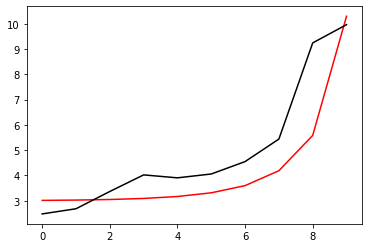

603 0.005052591570580144
[2.4811187  2.68329151 3.3643765  4.01954201 3.90435319 4.05842753
 4.5546394  5.45649728 9.27052819 9.96660681]


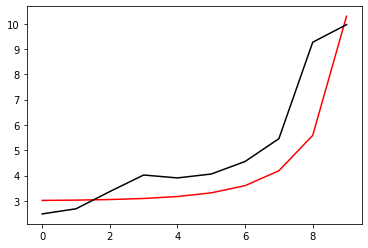

804 0.006567774155524035
[2.48252994 2.68276307 3.36185194 4.01582435 3.90190035 4.05801393
 4.55966297 5.47264388 9.29730617 9.96781688]


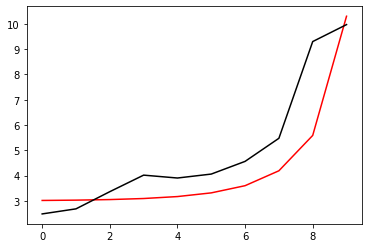

1005 0.008528503828607589
[2.48399652 2.6822256  3.35926102 4.01199693 3.89931392 4.05744912
 4.56453454 5.48866421 9.32398866 9.96903053]


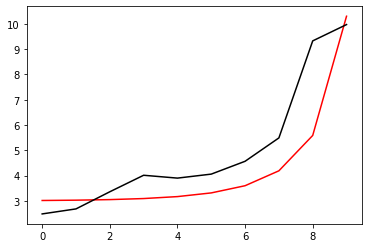

1206 0.01266889378912876
[2.48551104 2.68168124 3.35661269 4.00807166 3.89660312 4.05673577
 4.56923865 5.50450645 9.35050402 9.97024713]


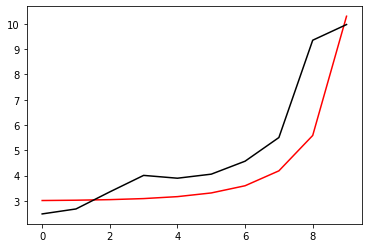

1407 0.005559218359357314
[2.4870891  2.68115344 3.35393629 4.00408181 3.89380297 4.05590841
 4.57380264 5.52017663 9.37683925 9.97145841]


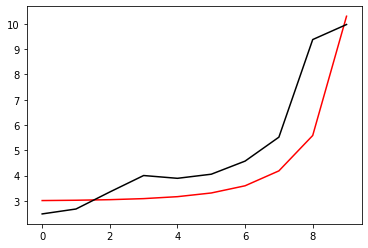

1608 0.009036976017408754
[2.48871887 2.68063396 3.35122584 4.00002256 3.89090896 4.05496093
 4.57821447 5.53564957 9.40296474 9.97265938]


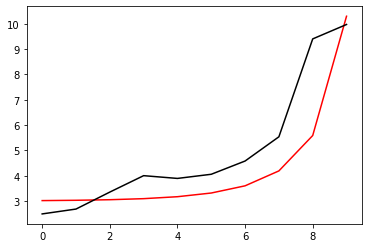

1809 0.0030801468845756117
[2.49041511 2.68014186 3.34850347 3.9959186  3.88794857 4.05392252
 4.58250222 5.55094422 9.42888919 9.97384856]


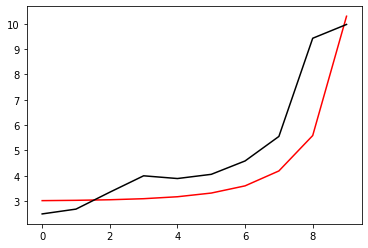

2010 0.006211720858452183
[2.49216687 2.67966779 3.34576063 3.99176195 3.88491494 4.05278645
 4.58665753 5.56604725 9.45460037 9.97502638]


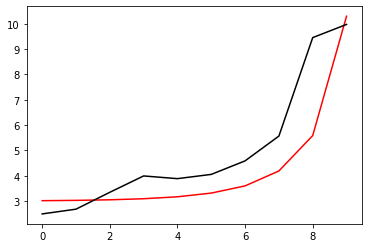

2211 0.0045235187559888035
[2.49397675 2.67921652 3.34300353 3.98756027 3.88181815 4.05156462
 4.59069307 5.58096835 9.48010591 9.97619377]


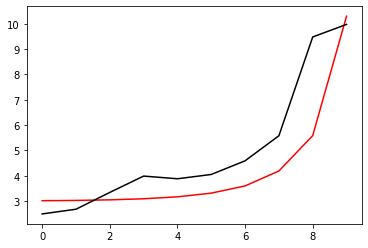

2412 0.006801714240032793
[2.49583545 2.67877979 3.34022433 3.98330635 3.87865261 4.05025274
 4.59460534 5.59570357 9.50540529 9.97735163]


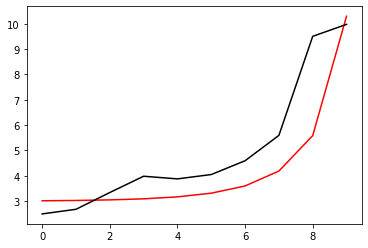

2613 0.01148844787549554
[2.49782095 2.67843135 3.33749269 3.97906643 3.87548238 4.048912
 4.59845006 5.6102939  9.53051659 9.97850065]


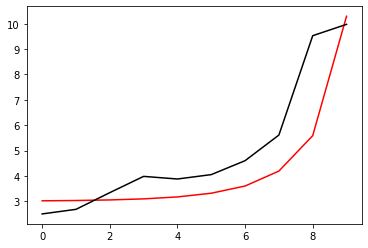

2814 0.0051470973597091425
[2.49985346 2.6780985  3.33474206 3.97478004 3.87225404 4.04749672
 4.60219223 5.62472242 9.55544996 9.97964155]


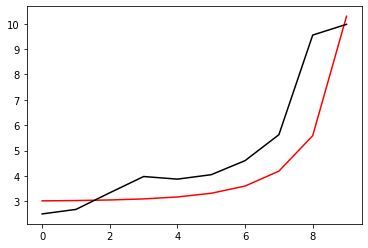

3015 0.002482464747197775
[2.50193748 2.67778729 3.33197974 3.97045613 3.86897926 4.04602153
 4.60585003 5.63901046 9.5802281  9.9807751 ]


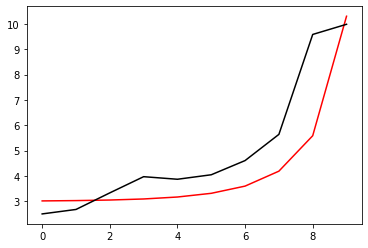

3216 0.005380985507825488
[2.50407218 2.67749675 3.32920459 3.96609379 3.86565814 4.04448784
 4.60942682 5.65316434 9.6048611  9.98190221]


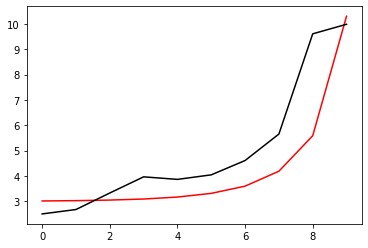

3417 1.0073526638591193
[2.50624977 2.67721967 3.32640989 3.96168717 3.86228628 4.04289315
 4.61292304 5.66718975 9.62936065 9.98302387]


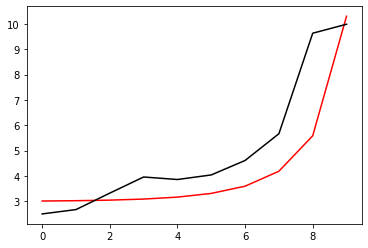

3618 0.002951654524907399
[2.50846971 2.67695796 3.32359998 3.95724332 3.85887389 4.04125158
 4.61635817 5.68111353 9.65375743 9.98414101]


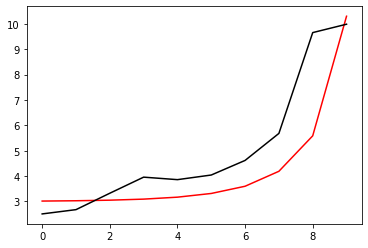

3819 0.00521585888084166
[2.51072221 2.67670229 3.32076621 3.95275458 3.85541432 4.03955825
 4.61973058 5.69494114 9.67806407 9.98525459]


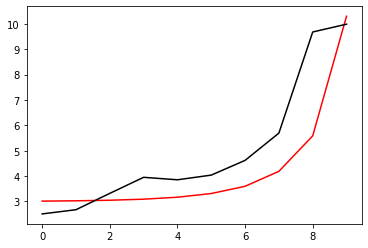

4020 0.006954169022202097
[2.51300087 2.67644696 3.31790381 3.94821729 3.85190484 4.03781212
 4.62304251 5.70868214 9.70229621 9.98636548]


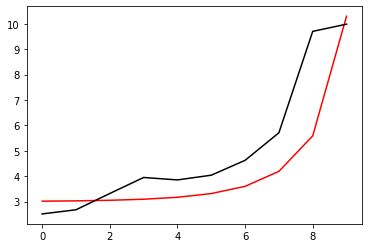

4221 0.9677069321680938
[2.51522073 2.6761013  3.31491897 3.94353741 3.84825465 4.03593386
 4.62624233 5.72234263 9.72653144 9.98747444]


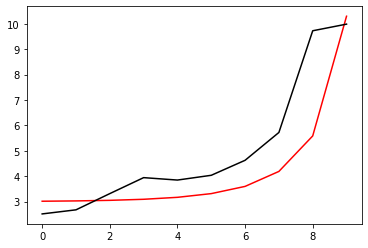

4422 0.0038074148978732452
[2.51746957 2.67576195 3.3119155  3.93882323 3.84457164 4.03402492
 4.62941241 5.73596395 9.7507472  9.98858268]


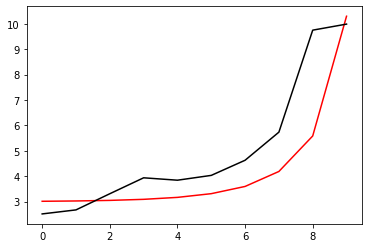

4623 1.8159197023009277
[2.51998762 2.67570004 3.30919739 3.93441481 3.84123641 4.03251738
 4.63304964 5.75010111 9.77547432 9.98969143]


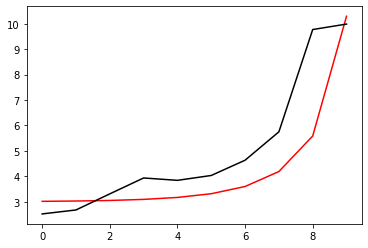

4824 1.0025834354198373
[2.52251324 2.67562354 3.30644133 3.92995368 3.83784738 4.03095692
 4.63663667 5.76419333 9.80019017 9.99080655]


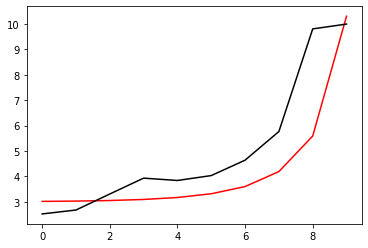

5025 0.8225139512735272
[2.52455507 2.67502462 3.30313299 3.92493034 3.83391478 4.02890547
 4.63985257 5.77815899 9.82512597 9.99193214]


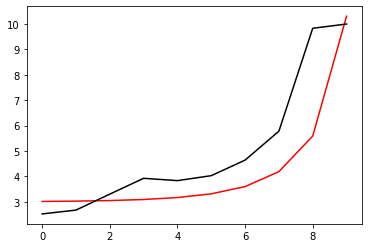

5226 0.0023488746281581114
[2.52661105 2.67442184 3.29980291 3.91987499 3.829949   4.02682381
 4.64304695 5.79212592 9.85009859 9.99307201]


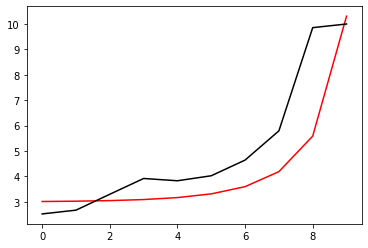

5427 0.002767019402327225
[2.52867902 2.6738146  3.29645288 3.91479106 3.82595258 4.02471478
 4.64622554 5.80611086 9.87512899 9.99422728]


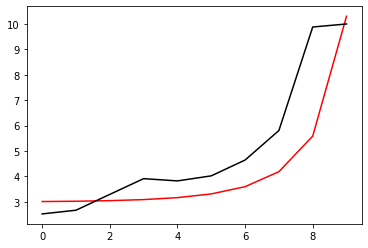

5628 0.002568013403759688
[2.53075985 2.67320551 3.29308798 3.9096854  3.82193125 4.02258428
 4.64939691 5.8201332  9.90023946 9.99539647]


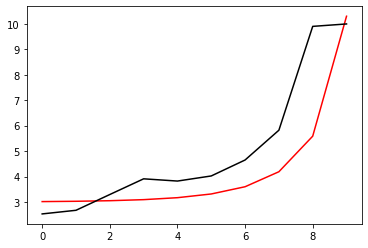

5829 0.0026063083181035907
[2.53285342 2.6725961  3.28971223 3.9045636  3.81788927 4.02043639
 4.65256761 5.83421052 9.9254504  9.9965761 ]


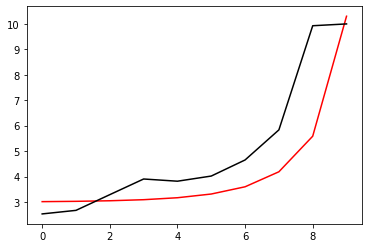

6030 0.0040087907374158314
[2.53495569 2.67198365 3.286325   3.89942624 3.81382534 4.01826914
 4.65573758 5.84835388 9.95077635 9.99776173]


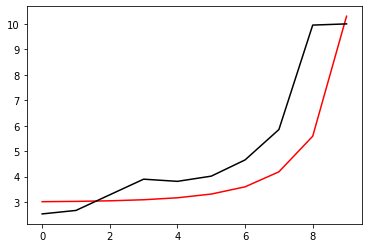

6231 2.0030660623608676
[2.53707026 2.67137358 3.28293425 3.89428284 3.80974763 4.01609041
 4.65891693 5.86258413 9.97623882 9.99894901]


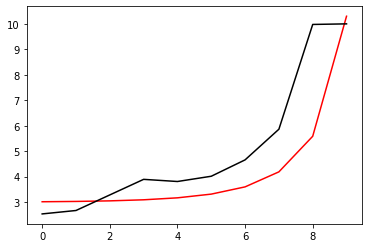

6432 0.017390226747995525
[ 2.53932208  2.67087913  3.27964375  3.88922774  3.80573838  4.01397054
  4.66216229  5.87694226 10.00184447 10.00013471]


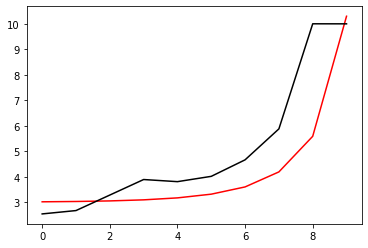

6633 0.0028521700516160025
[ 2.54158427  2.67038825  3.2763554   3.88417493  3.80172069  4.01184369
  4.66542557  5.89141737 10.02761814 10.00131741]


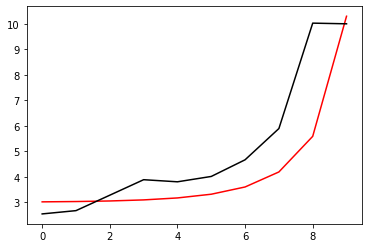

6834 0.005134915458368281
[ 2.5438502   2.66989499  3.27306454  3.87912013  3.79768809  4.00970201
  4.66869977  5.90601258 10.05356447 10.00249787]


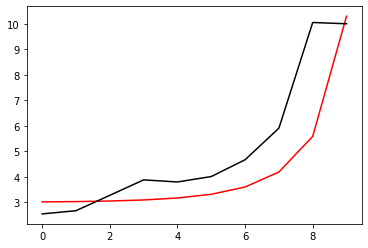

7035 0.004181971134336093
[ 2.54612594  2.66940651  3.26977995  3.87407293  3.7936487   4.00755291
  4.67199352  5.92074539 10.07969777 10.00367879]


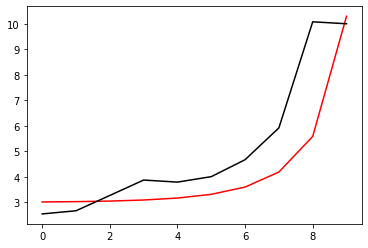

7236 0.008071791608792749
[ 2.54840677  2.66891786  3.26649694  3.86902816  3.78959481  4.00538664
  4.67529668  5.93561373 10.10601539 10.00486425]


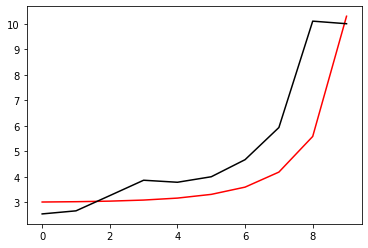

7437 1.0024041114248083
[ 2.55069756  2.66843625  3.26322523  3.86399738  3.78553819  4.0032159
  4.67862478  5.950643   10.13253821 10.00605879]


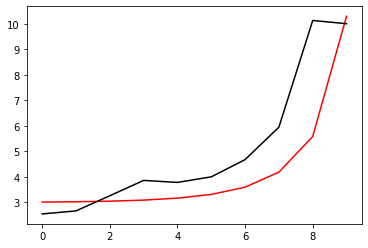

7638 0.0022363065350618347
[ 2.55300414  2.66796796  3.25997177  3.85898764  3.78148458  4.00104544
  4.68198274  5.96584427 10.15927071 10.00726667]


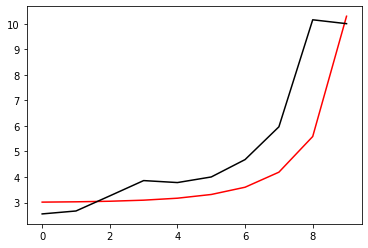

7839 0.008863993370229884
[ 2.55534897  2.66753215  3.25675296  3.85401233  3.77744334  3.99888055
  4.68537174  5.9812185  10.18620176 10.00849098]


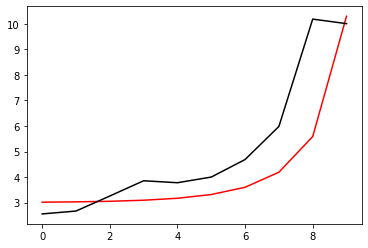

8040 0.004045965740431764
[ 2.55770388  2.66710418  3.25354734  3.84905251  3.77339727  3.99670613
  4.68878073  5.99676689 10.21333509 10.00973306]


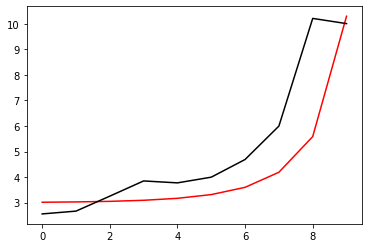

8241 0.0033706201067756703
[ 2.56007082  2.66668618  3.25035715  3.84411029  3.76934791  3.99452315
  4.69221082  6.01249496 10.24066852 10.01099226]


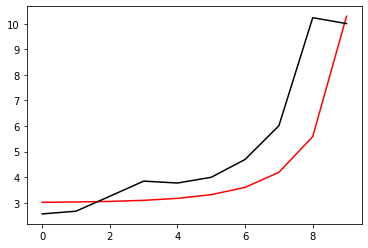

8442 0.0025844407017798702
[ 2.56245237  2.66628083  3.24718499  3.83918798  3.76529722  3.99233313
  4.69566341  6.02840728 10.26819759 10.01226627]


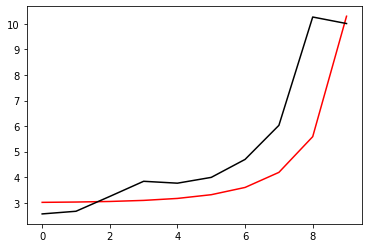

8643 0.003633017321343358
[ 2.56484838  2.665888    3.24403055  3.83428504  3.76124468  3.99013561
  4.69913877  6.04450792 10.29591873 10.01355161]


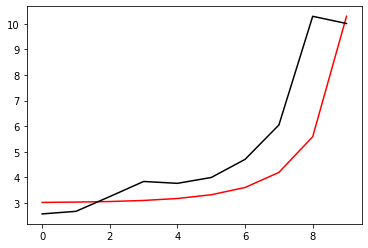

8844 0.006456633756354929
[ 2.56728844  2.66553386  3.24091661  3.829421    3.75720709  3.98794394
  4.70264519  6.06079731 10.32381163 10.01484436]


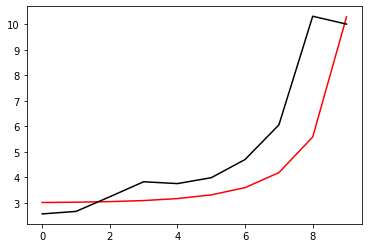

9045 0.0020529415093265514
[ 2.56974515  2.66519404  3.23782098  3.82457563  3.75316669  3.98574265
  4.70617023  6.07726916 10.35186842 10.01614086]


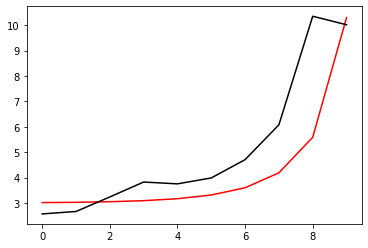

9246 0.001870781329278553
[ 2.5722168   2.66486677  3.2347413   3.81974605  3.74912101  3.98352919
  4.70971098  6.09391925 10.38007478 10.01743837]


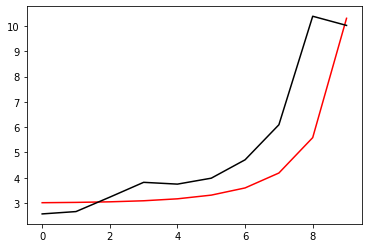

9447 0.004758271740897047
[ 2.57469586  2.66454381  3.23166806  3.81492156  3.74505919  3.98129187
  4.71325408  6.11073099 10.40840652 10.01873542]


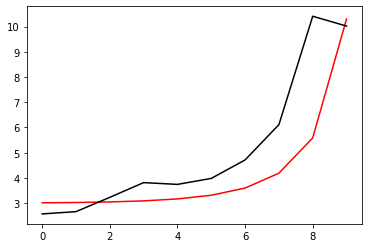

9648 1.0033128168854977
[ 2.57718663  2.66422955  3.22860514  3.81010575  3.74098593  3.9790361
  4.7168052   6.12770617 10.43685252 10.02003186]


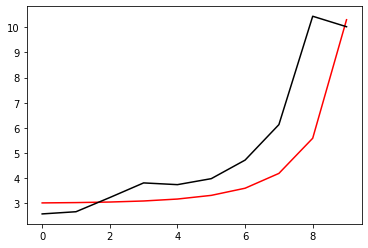

9849 0.0018778414799930391
[ 2.57969377  2.6639287   3.22555662  3.80530233  3.73690612  3.97676756
  4.72037026  6.14484553 10.4654002  10.02132868]


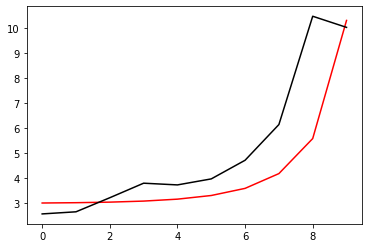

In [189]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, Positive[i%set], Negative[i%set]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

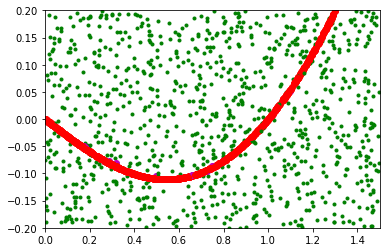

In [190]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()